<a href="https://colab.research.google.com/github/CamillaSemenzzatt/PROJETO-APLICADO-III/blob/main/Limpeza_Atividade_no_Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import the necessary libraries.
import pandas as pd

# Download the Excel file from GitHub.
!wget -O Agrupamento_de_atividade.xlsx 'https://github.com/CamillaSemenzzatt/PROJETO-APLICADO-III/raw/4ac41b85acfcf2f6a61625bfb5c7e1ed98040350/tabela5434%20(1).xlsx'

# Read the Excel file into a Pandas DataFrame.
tabela = pd.read_excel('Agrupamento_de_atividade.xlsx')

# Print the DataFrame.
print(tabela)

--2025-03-23 13:35:19--  https://github.com/CamillaSemenzzatt/PROJETO-APLICADO-III/raw/4ac41b85acfcf2f6a61625bfb5c7e1ed98040350/tabela5434%20(1).xlsx
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CamillaSemenzzatt/PROJETO-APLICADO-III/4ac41b85acfcf2f6a61625bfb5c7e1ed98040350/tabela5434%20(1).xlsx [following]
--2025-03-23 13:35:20--  https://raw.githubusercontent.com/CamillaSemenzzatt/PROJETO-APLICADO-III/4ac41b85acfcf2f6a61625bfb5c7e1ed98040350/tabela5434%20(1).xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 206126 (201K) [application/octet-stream]
Saving to: ‘Agrupamento_de_atividade.xls

In [3]:
tabela = tabela.drop([0, 1])
tabela = tabela.reset_index(drop=True)

tabela = tabela.rename(columns={
    'Tabela 5434 - Pessoas de 14 anos ou mais de idade, ocupadas na semana de referência, por grupamento de atividade no trabalho principal': 'municipio',
    'Unnamed: 1': 'trimestre',
    'Unnamed: 2': 'Ocupação no trabalho',
    'Unnamed: 3': 'quantidade'
})

ultima_palavra_valida = {coluna: None for coluna in tabela.columns}

for index, row in tabela.iterrows():
    for coluna in tabela.columns:
        if pd.isnull(row[coluna]):
            if ultima_palavra_valida[coluna] is not None:
                row[coluna] = ultima_palavra_valida[coluna]
        else:
            ultima_palavra_valida[coluna] = row[coluna]
            for outra_coluna in tabela.columns:
                if outra_coluna != coluna and pd.isnull(row[outra_coluna]):
                    ultima_palavra_valida[outra_coluna] = None

tabela['quantidade'] = tabela['quantidade'].replace(['...', '-'], 0)

tabela = tabela.drop(tabela.index[-1])

<ipython-input-3-7c432cbd9157>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tabela['quantidade'] = tabela['quantidade'].replace(['...', '-'], 0)


In [4]:
from tabulate import tabulate

tabela_lista = tabela.values.tolist()

tabela_lista.insert(0, tabela.columns.tolist())

print(tabulate(tabela_lista, headers="firstrow", tablefmt="grid"))

+---------------------+-------------------+-------------------------------------------------------------------------------------------------+--------------+
| municipio           | trimestre         | Ocupação no trabalho                                                                            |   quantidade |
+=====================+===================+=================================================================================================+==============+
| Rondônia            | 1º trimestre 2012 | Agricultura, pecuária, produção florestal, pesca e aquicultura                                  |          149 |
+---------------------+-------------------+-------------------------------------------------------------------------------------------------+--------------+
| Rondônia            | 1º trimestre 2012 | Indústria geral                                                                                 |           66 |
+---------------------+-------------------+---------------

<ipython-input-19-987d8a5b358f>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos


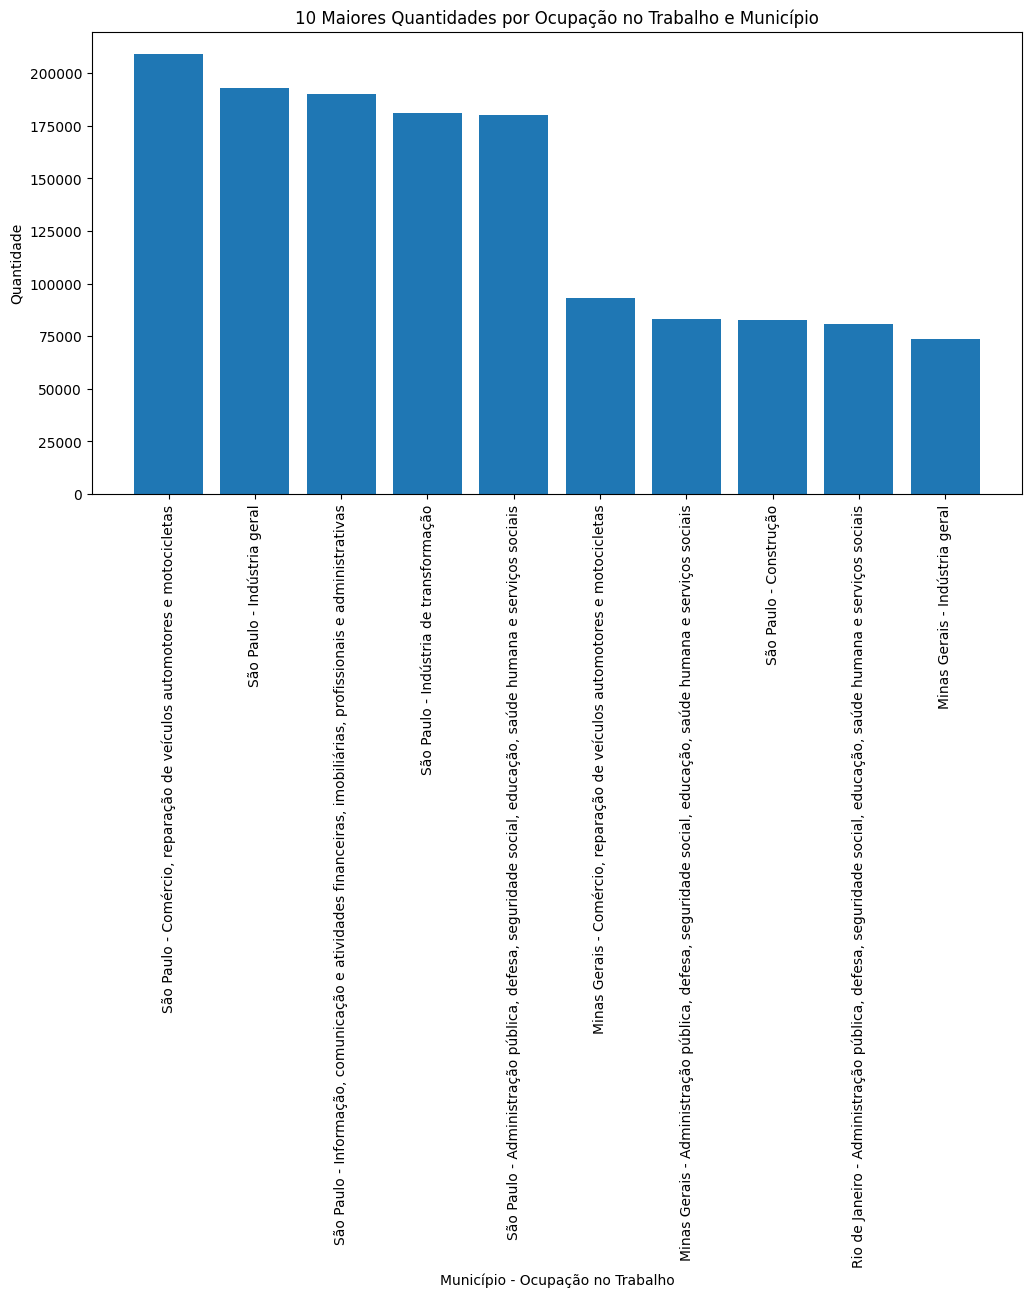

In [19]:
import matplotlib.pyplot as plt

# Agrupa por município e ocupação, somando as quantidades
top_10 = tabela.groupby(['municipio', 'Ocupação no trabalho'])['quantidade'].sum().nlargest(10)

# Converte para DataFrame para facilitar a plotagem
top_10_df = top_10.reset_index()


# Cria o gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura
plt.bar(top_10_df['municipio'] + ' - ' + top_10_df['Ocupação no trabalho'], top_10_df['quantidade'])
plt.xlabel('Município - Ocupação no Trabalho')
plt.ylabel('Quantidade')
plt.title('10 Maiores Quantidades por Ocupação no Trabalho e Município')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()

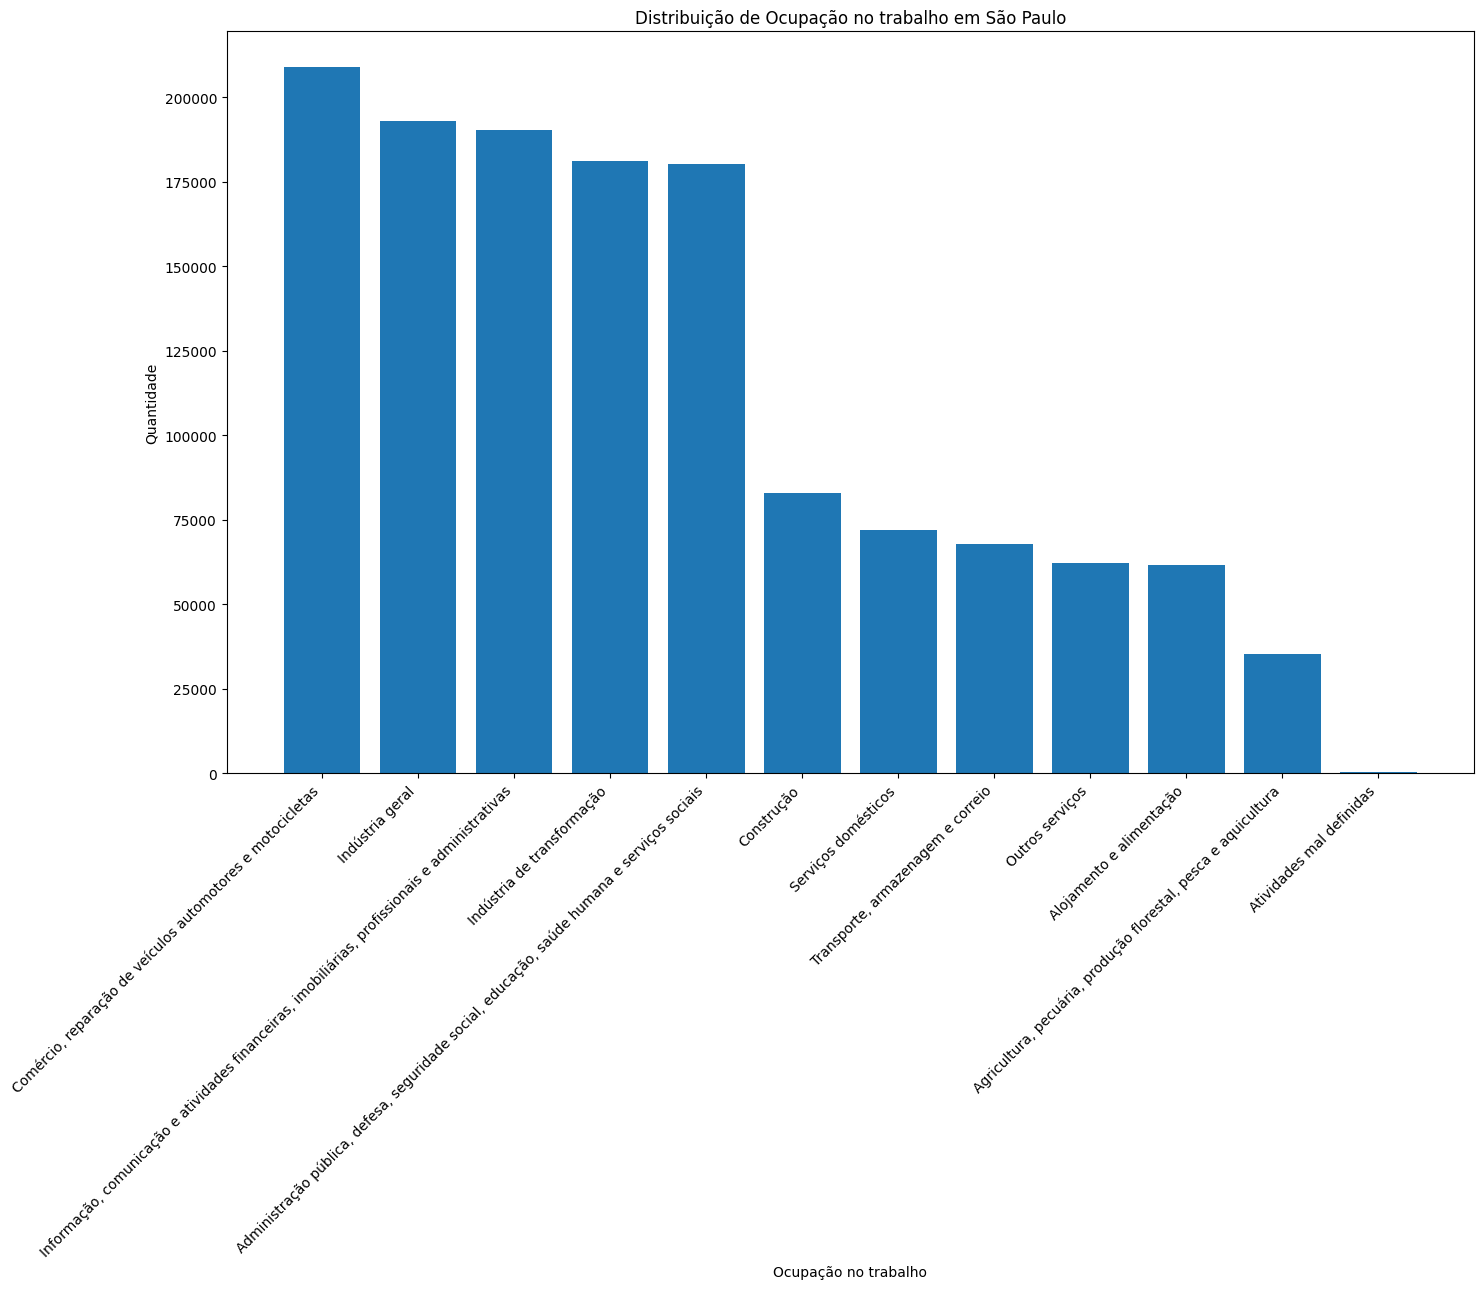

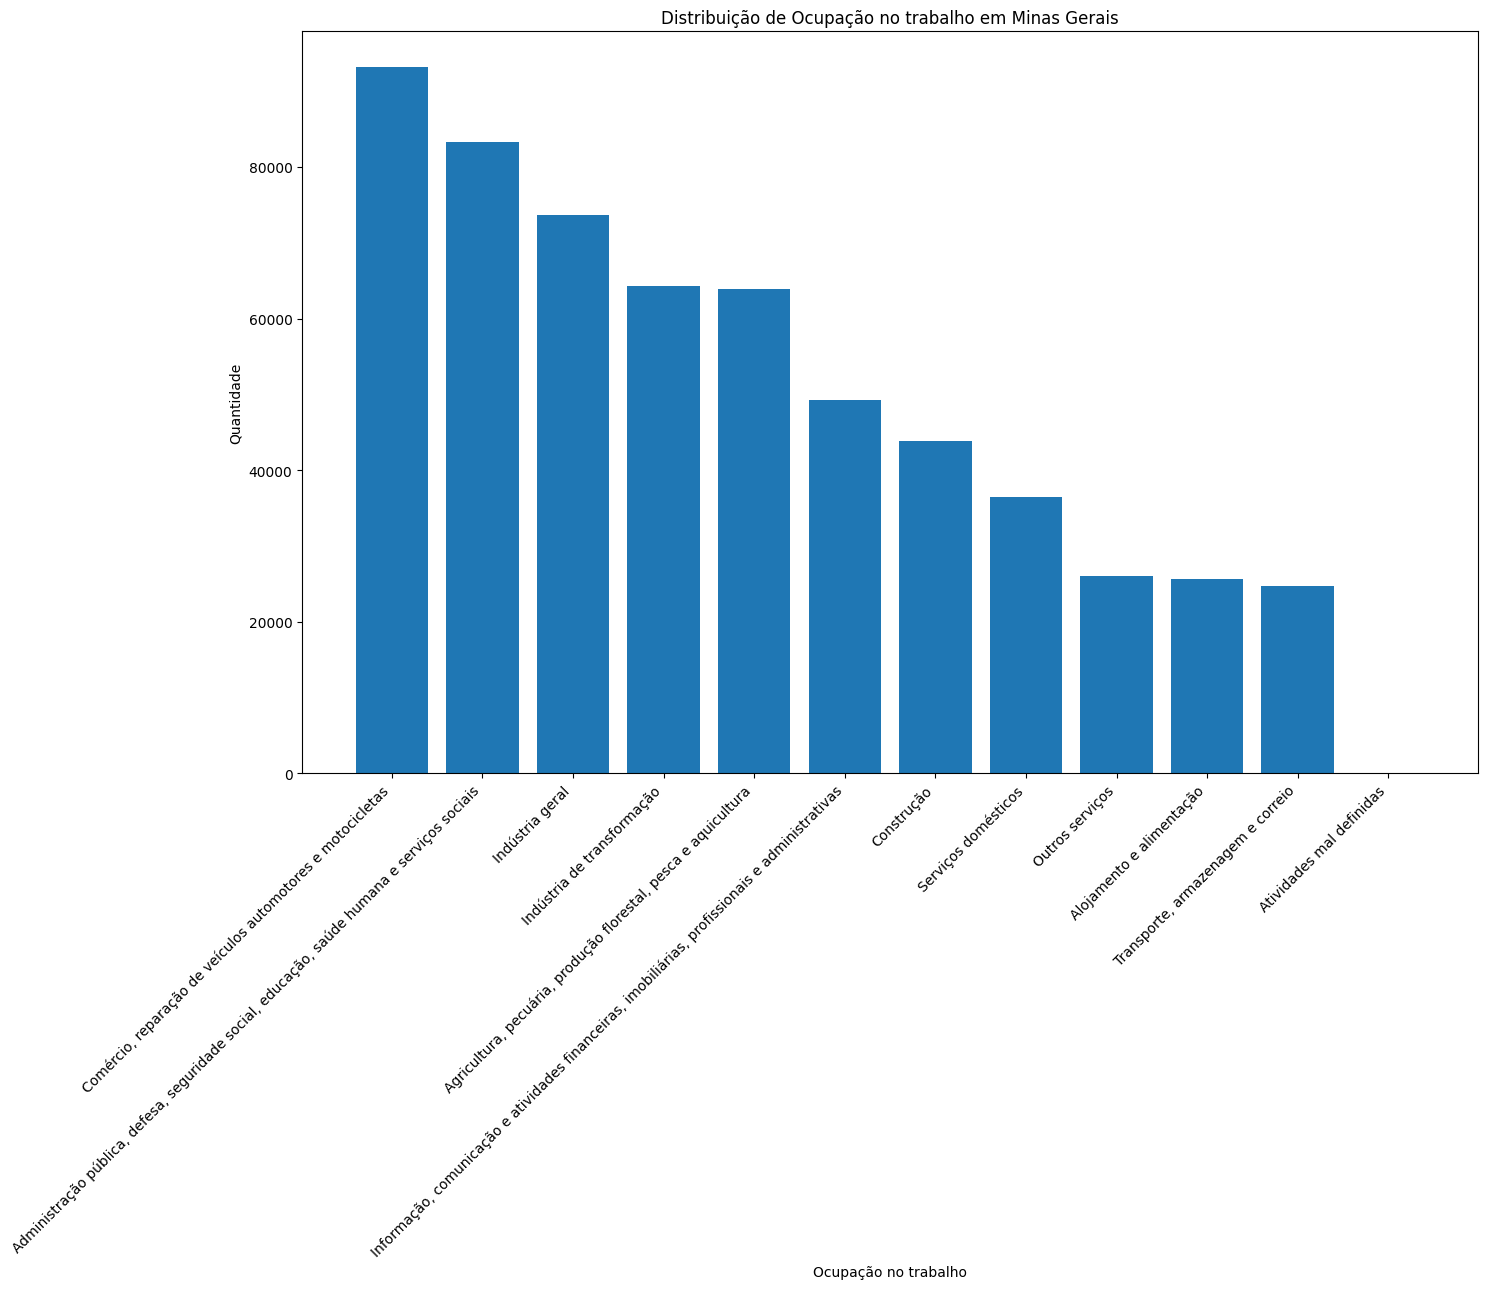

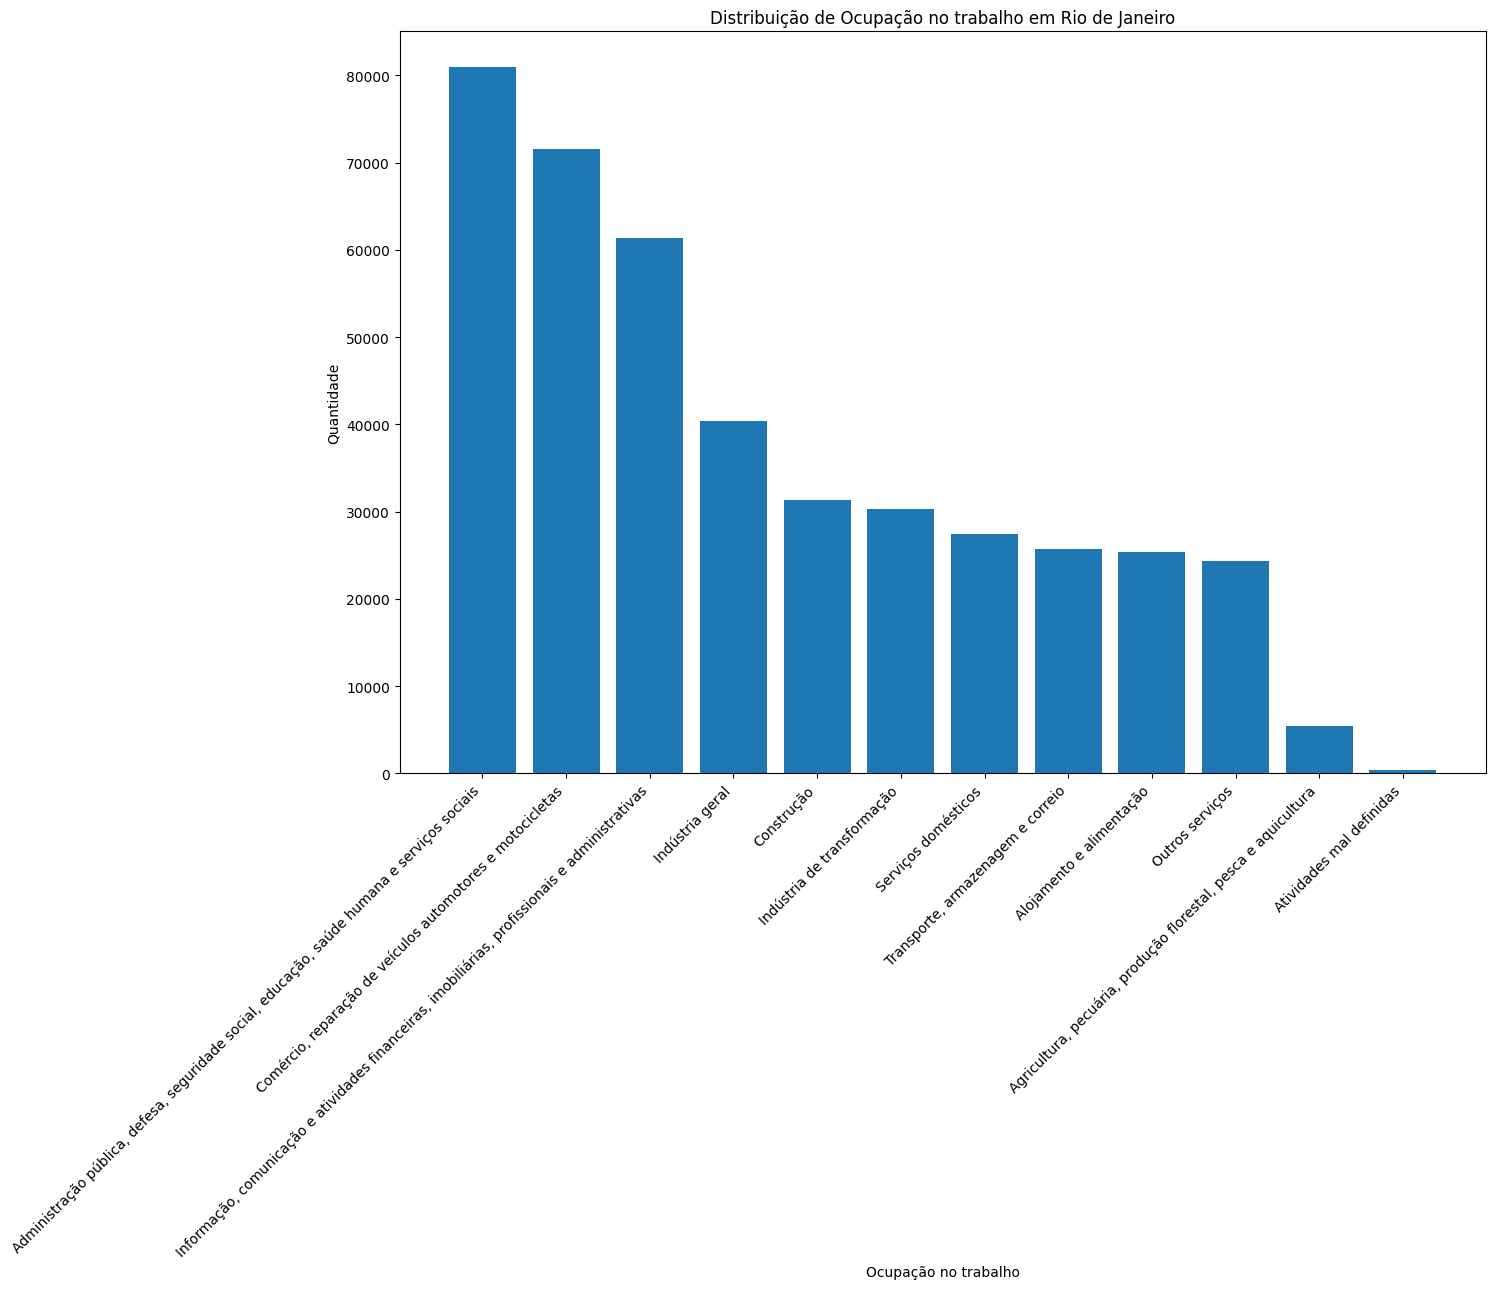

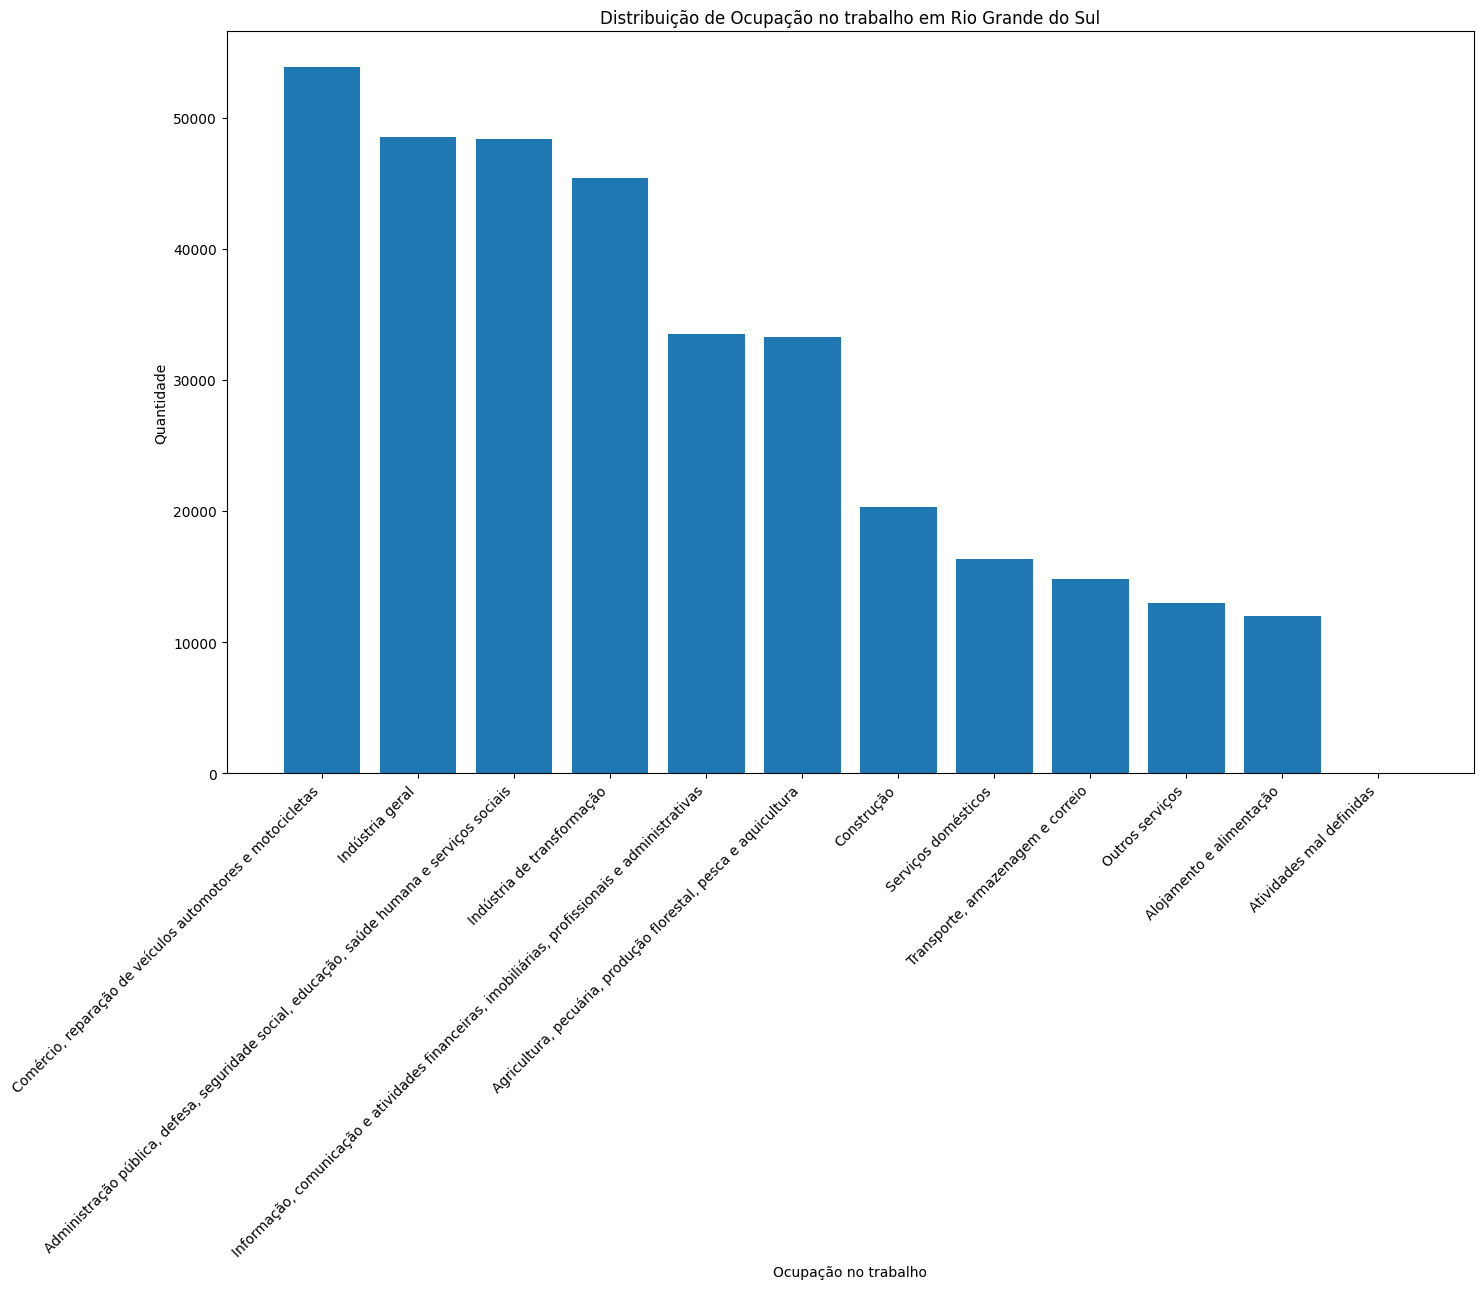

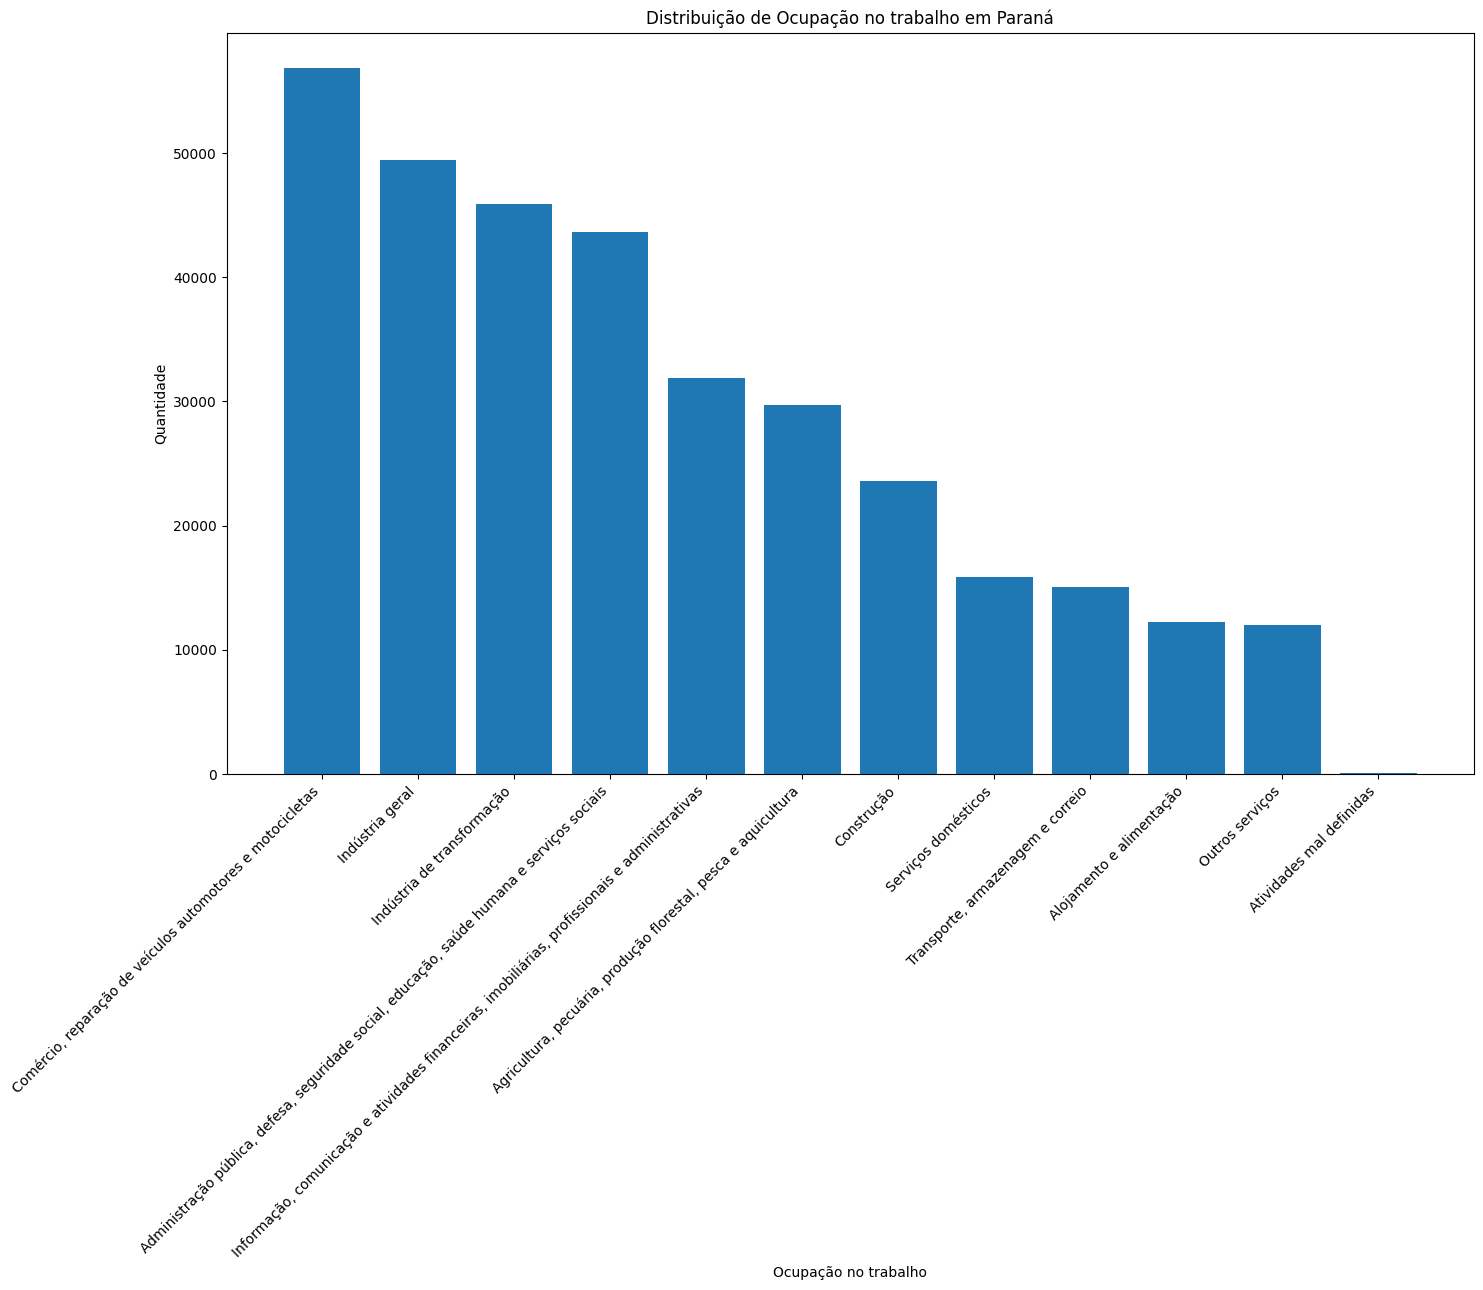

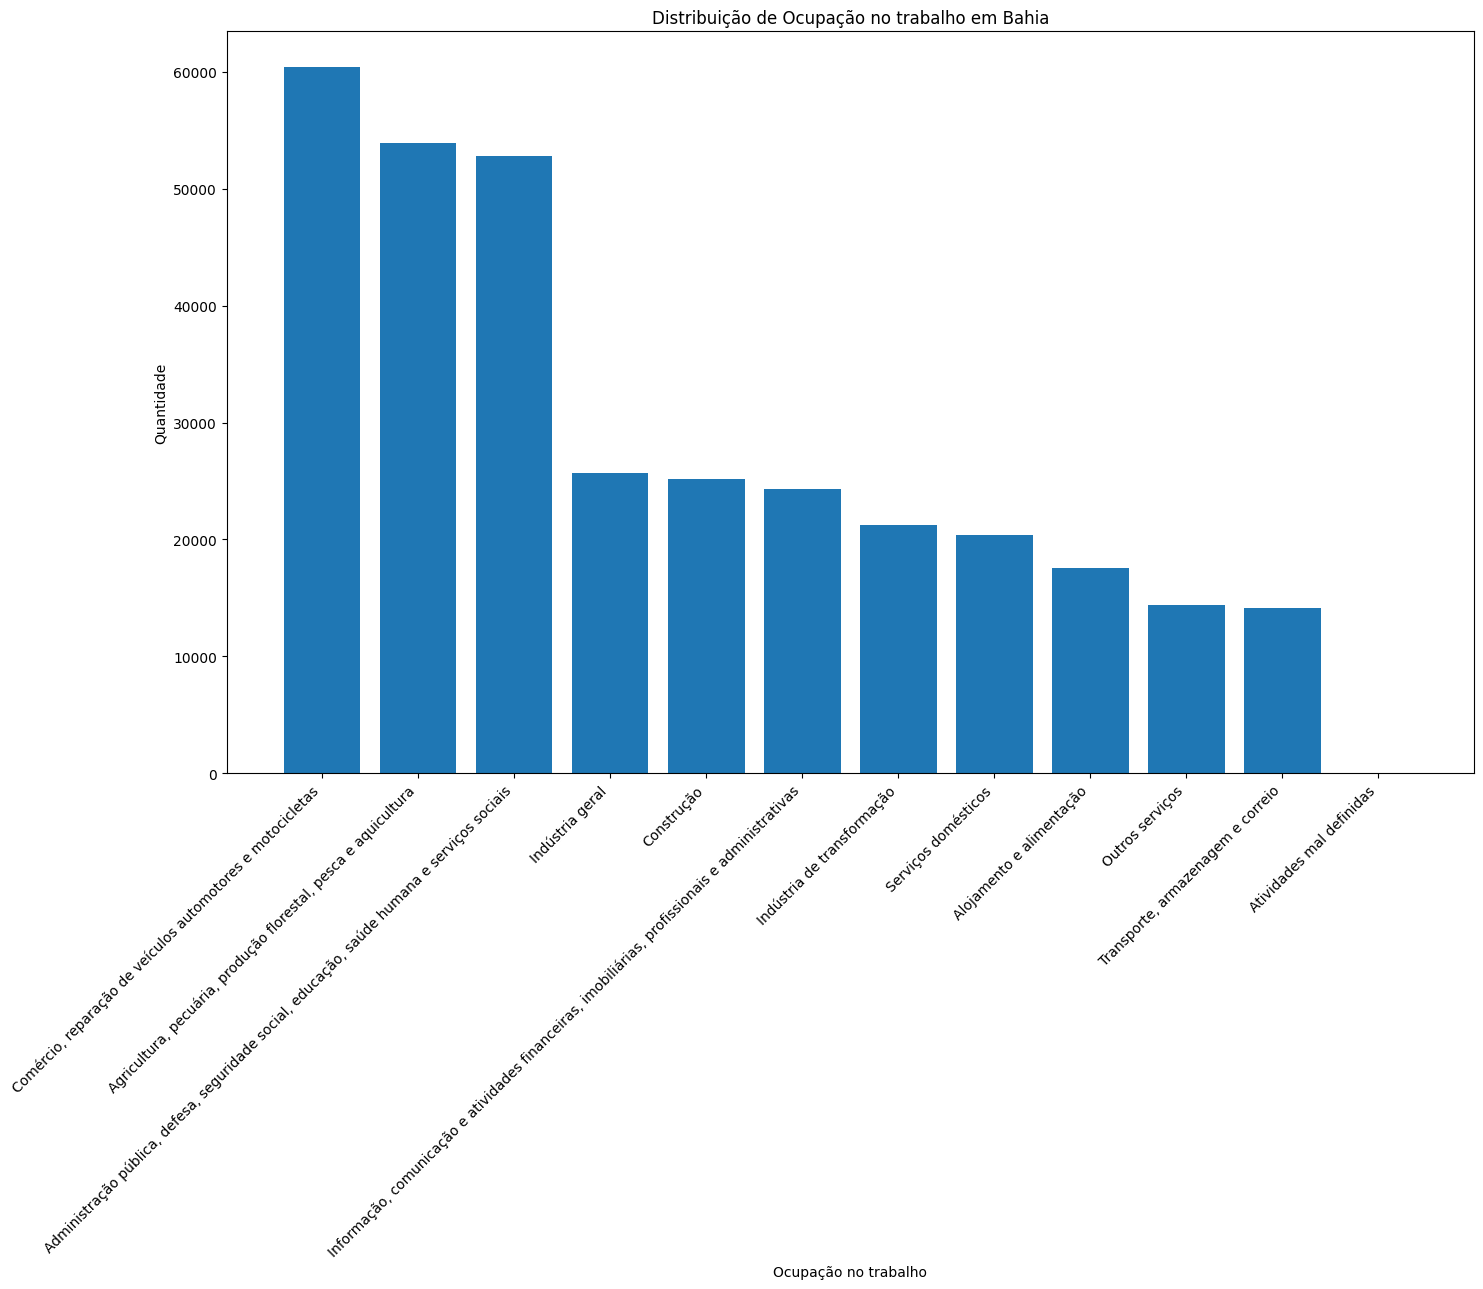

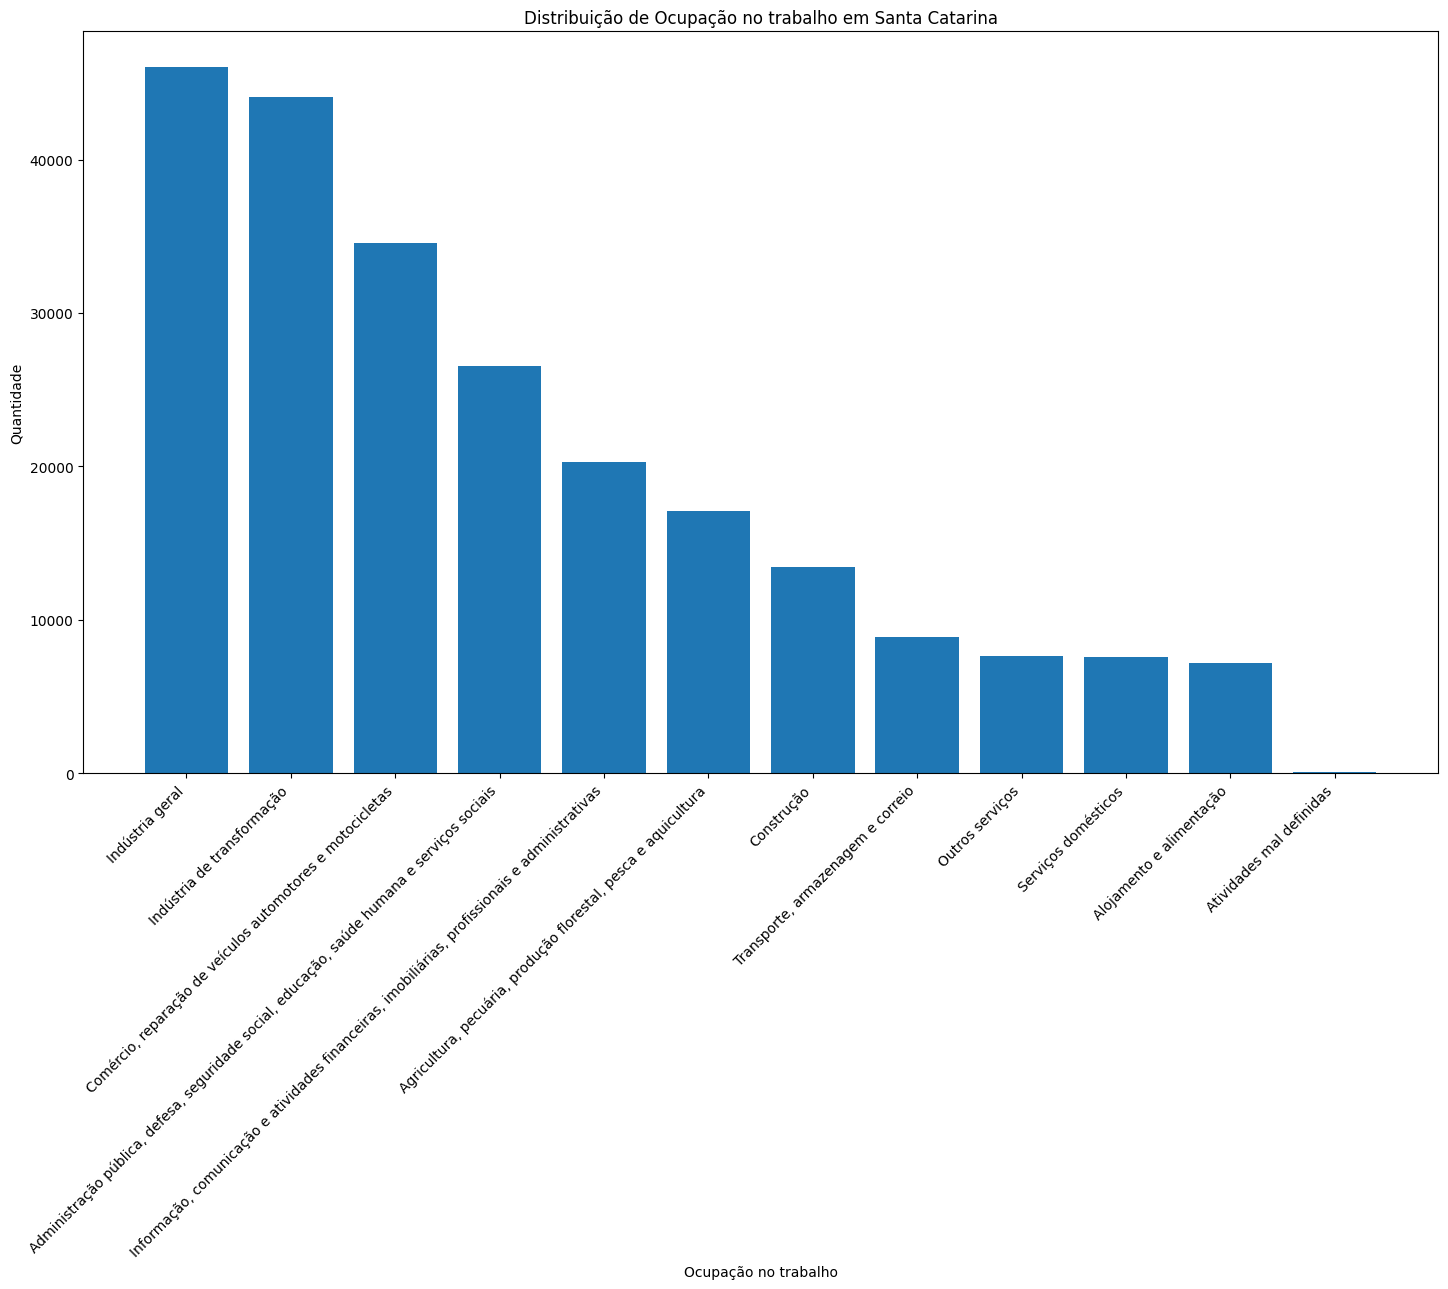

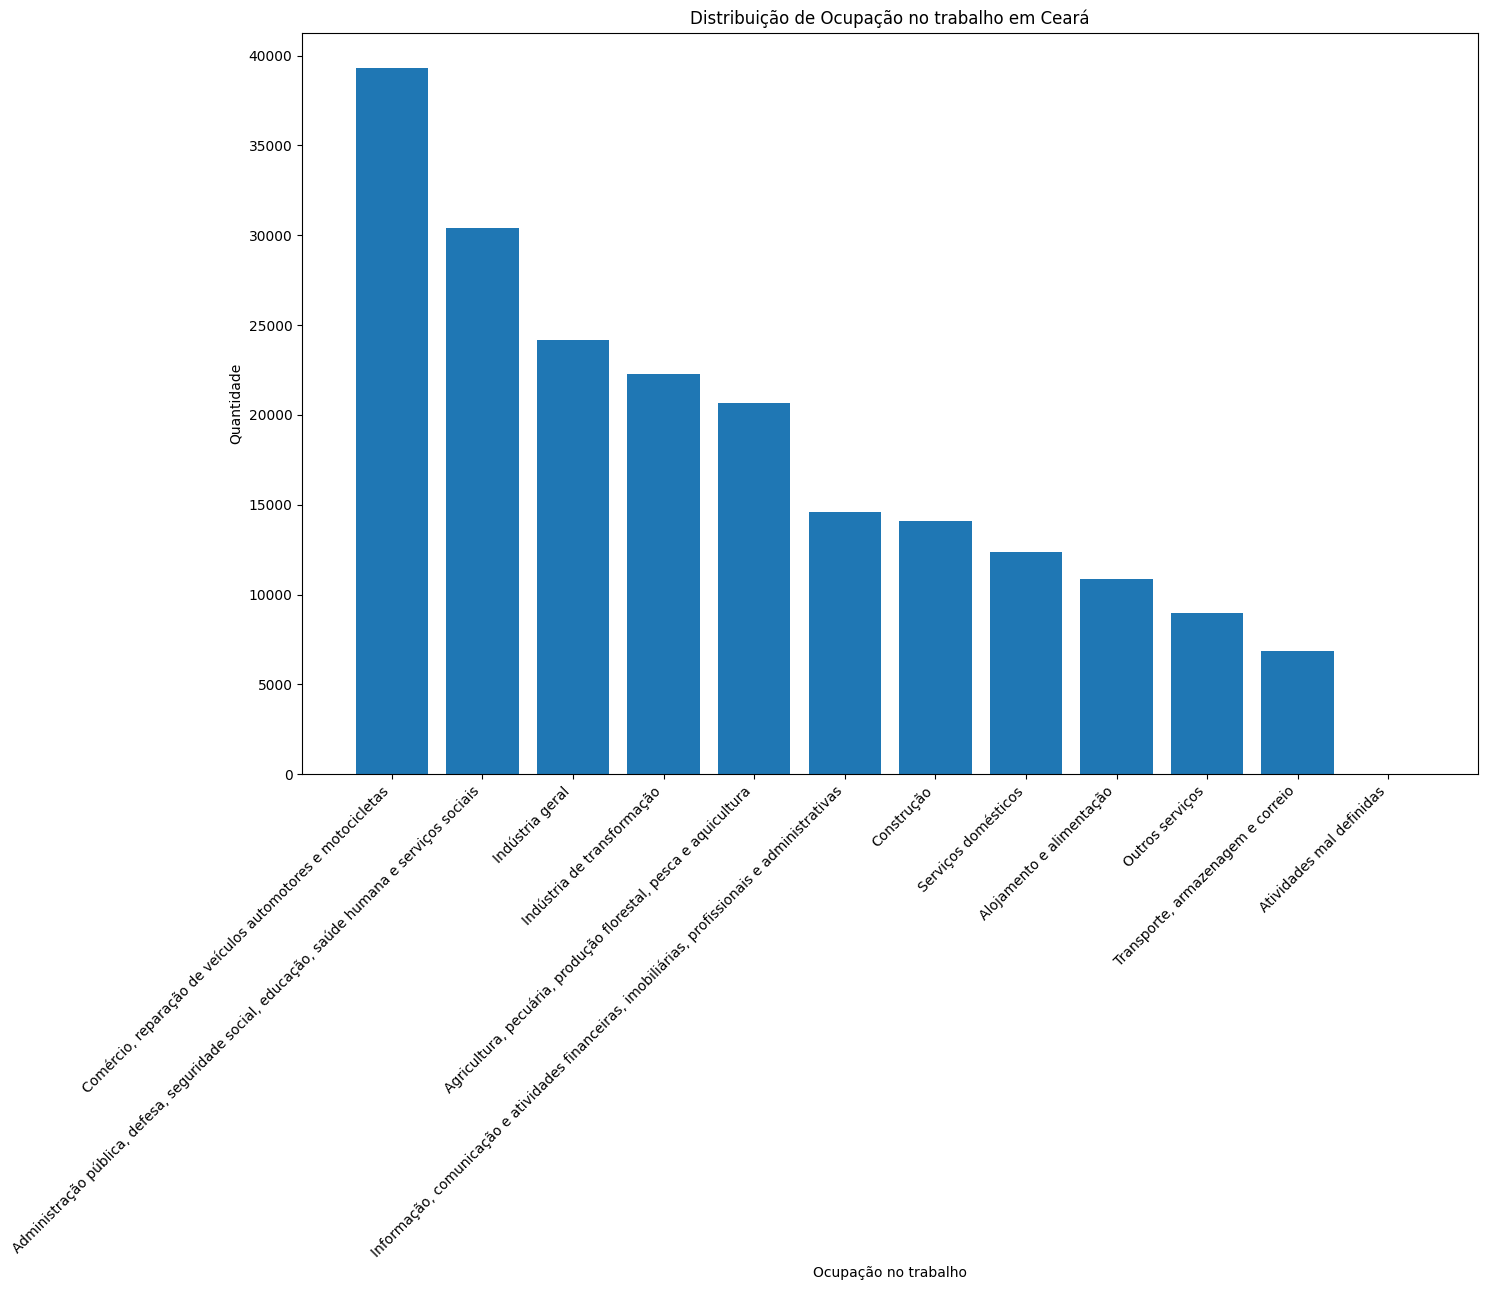

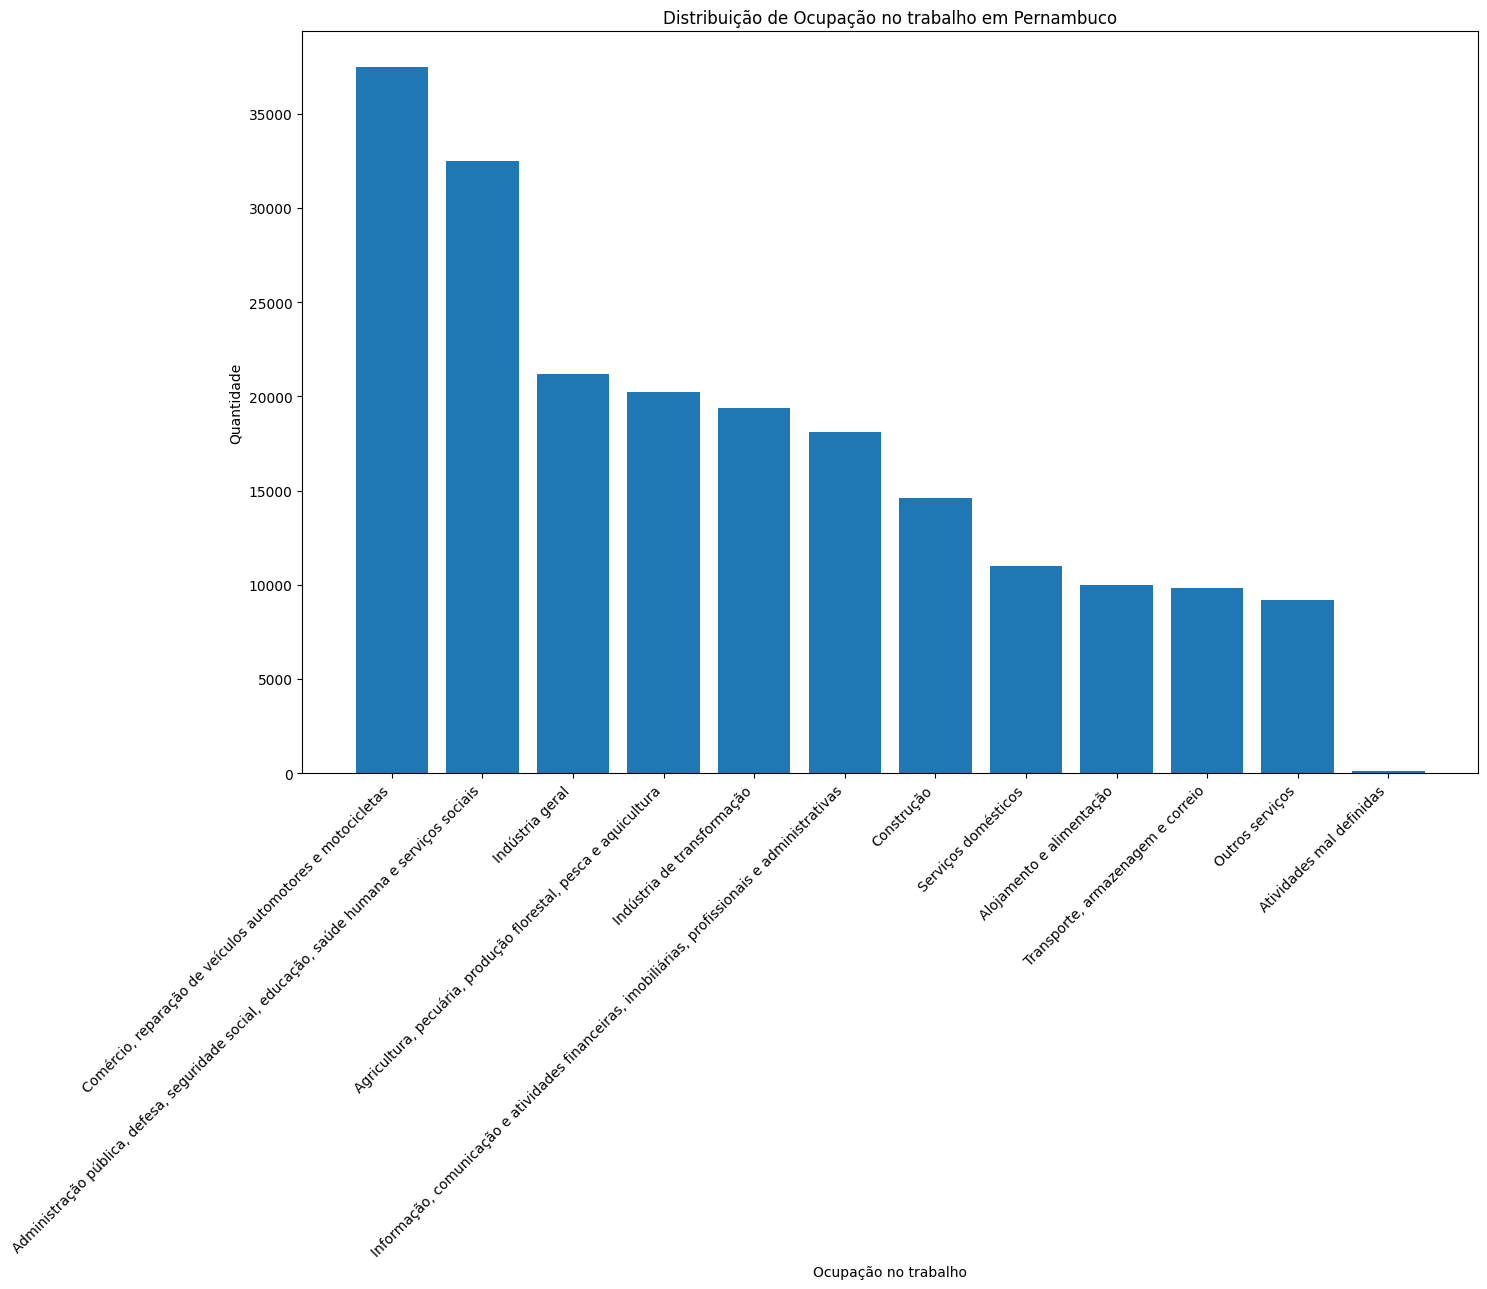

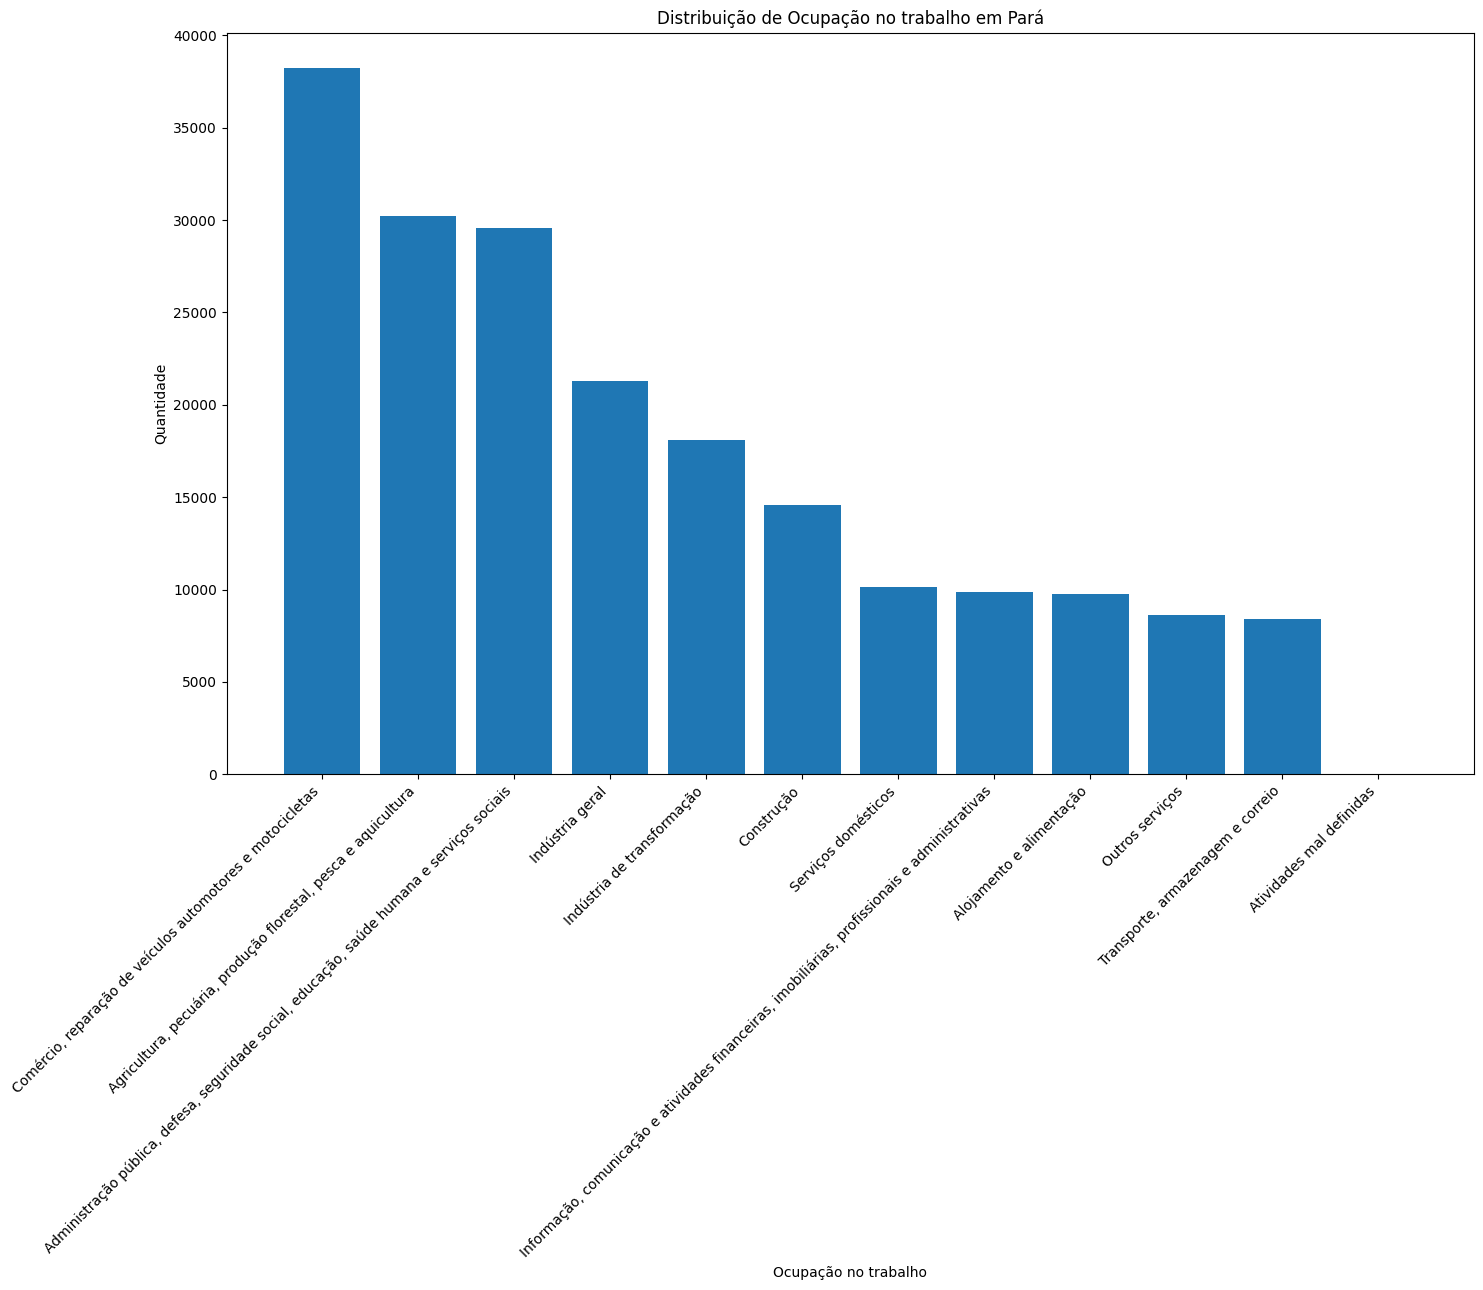

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtém os 10 municípios com mais ocorrências
dados_agrupados = tabela.groupby('municipio')['quantidade'].sum().reset_index()
maiores_ofensores = dados_agrupados.sort_values(by=['quantidade'], ascending=False).head(10)['municipio'].tolist()

# Itera pelos municípios e cria um gráfico para cada um
for municipio in maiores_ofensores:
    # Filtra os dados para o município atual
    dados_municipio = tabela[tabela['municipio'] == municipio]

    # Agrupa por "Ocupação no trabalho" e soma as quantidades
    dados_agrupados_ocupacao = dados_municipio.groupby('Ocupação no trabalho')['quantidade'].sum().reset_index()

    # Ordena por quantidade em ordem decrescente
    dados_agrupados_ocupacao = dados_agrupados_ocupacao.sort_values(by=['quantidade'], ascending=False)

    # Cria o gráfico de barras
    plt.figure(figsize=(15, 13))
    plt.bar(dados_agrupados_ocupacao['Ocupação no trabalho'], dados_agrupados_ocupacao['quantidade'])
    plt.xlabel('Ocupação no trabalho')
    plt.ylabel('Quantidade')
    plt.title(f'Distribuição de Ocupação no trabalho em {municipio}')
    plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
    plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
    plt.show()

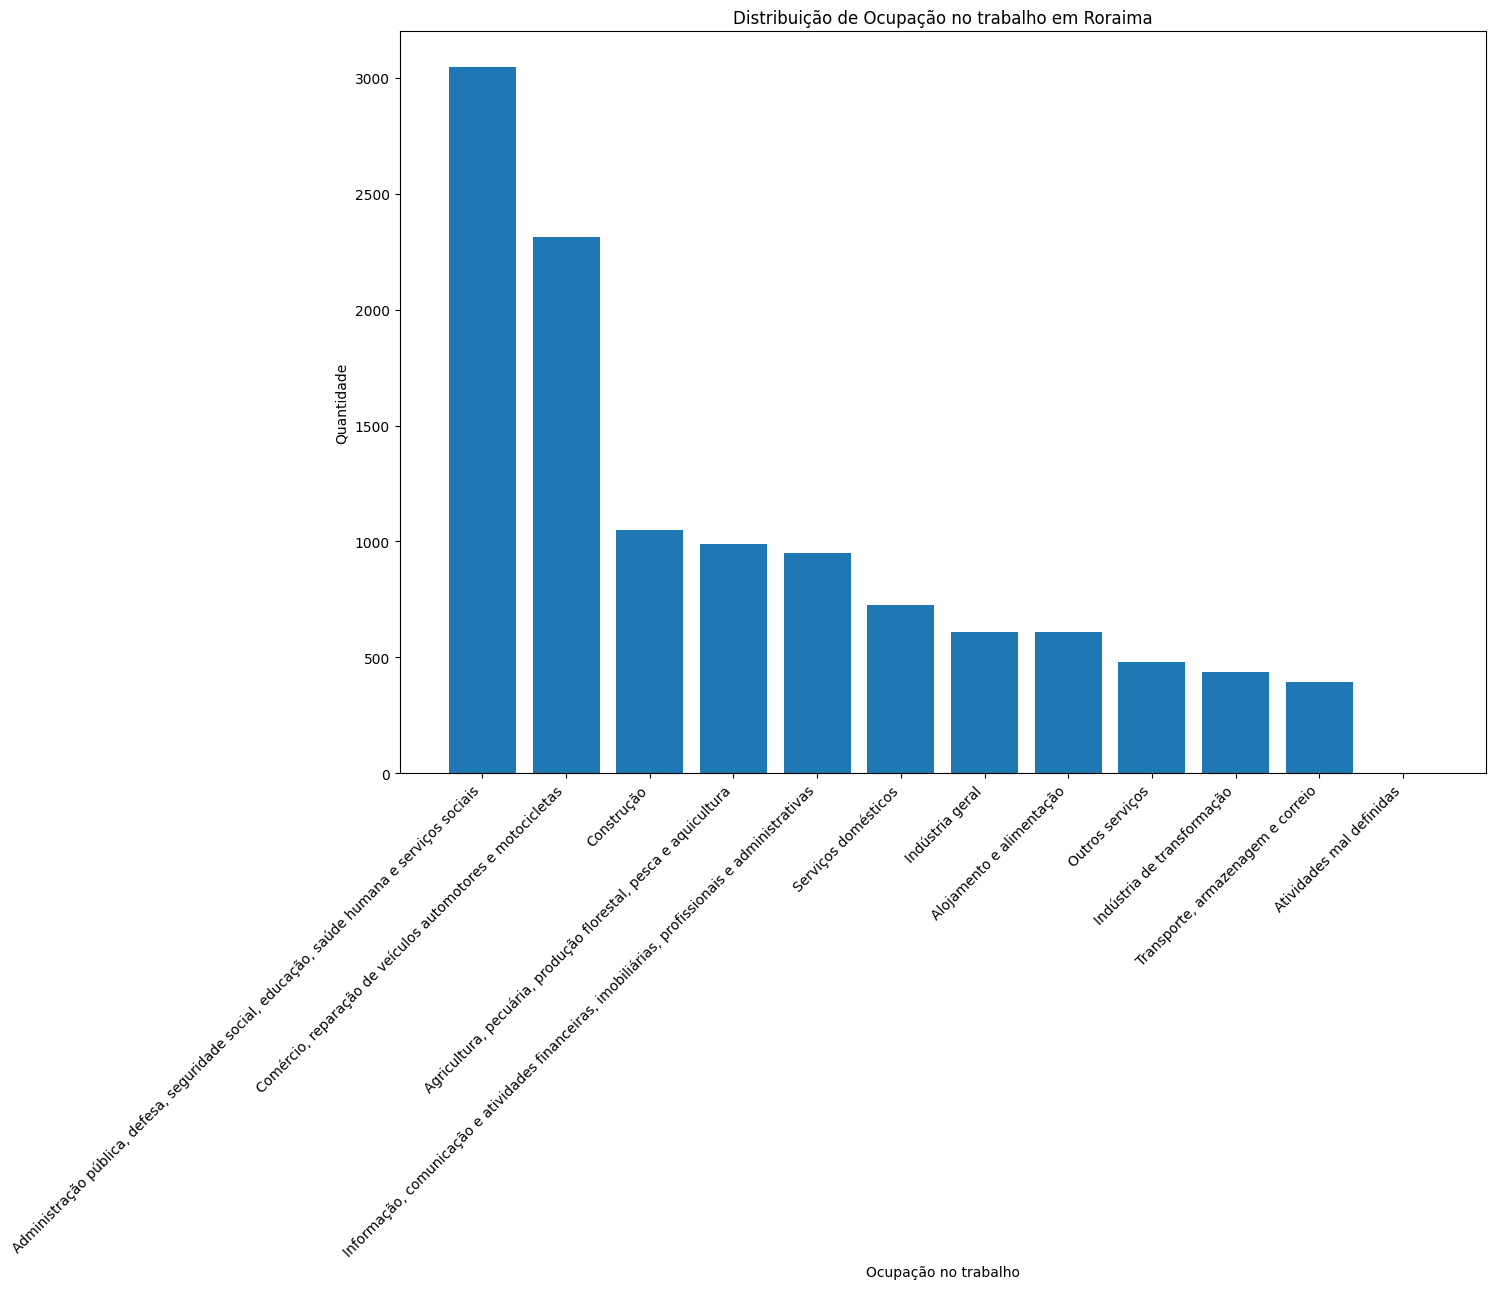

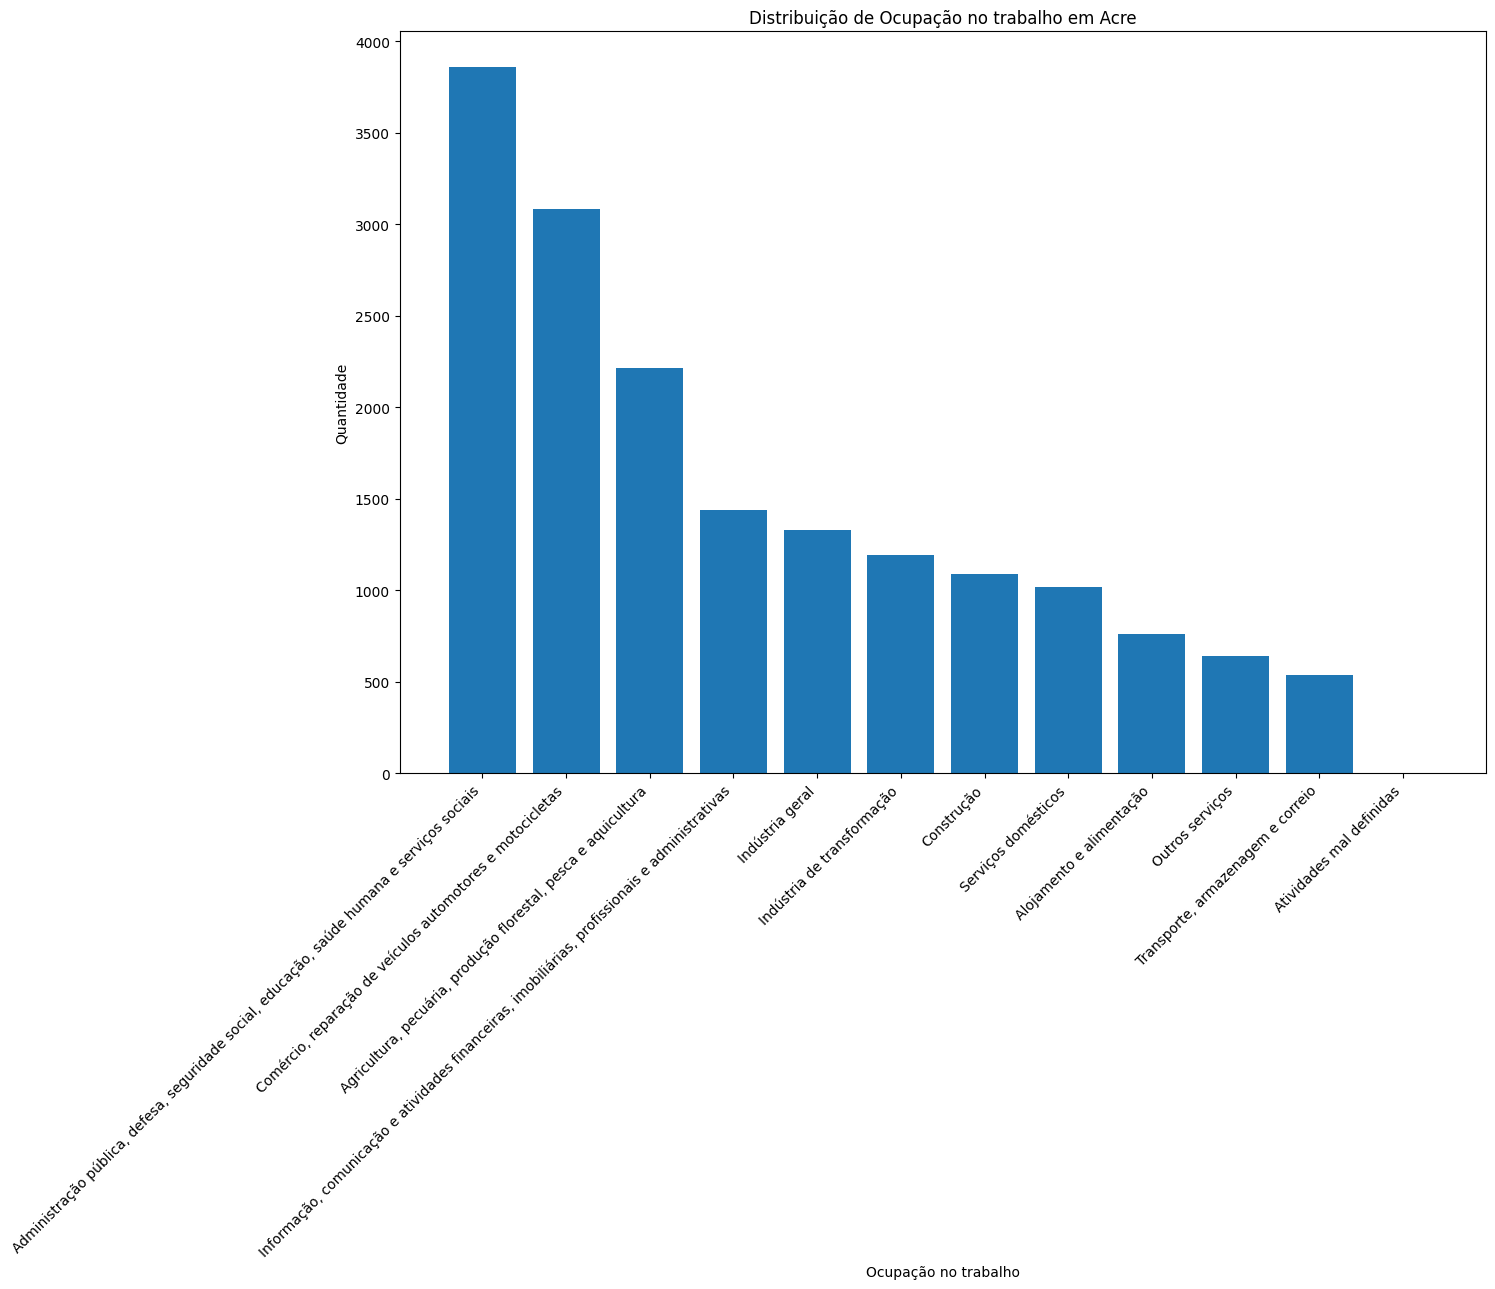

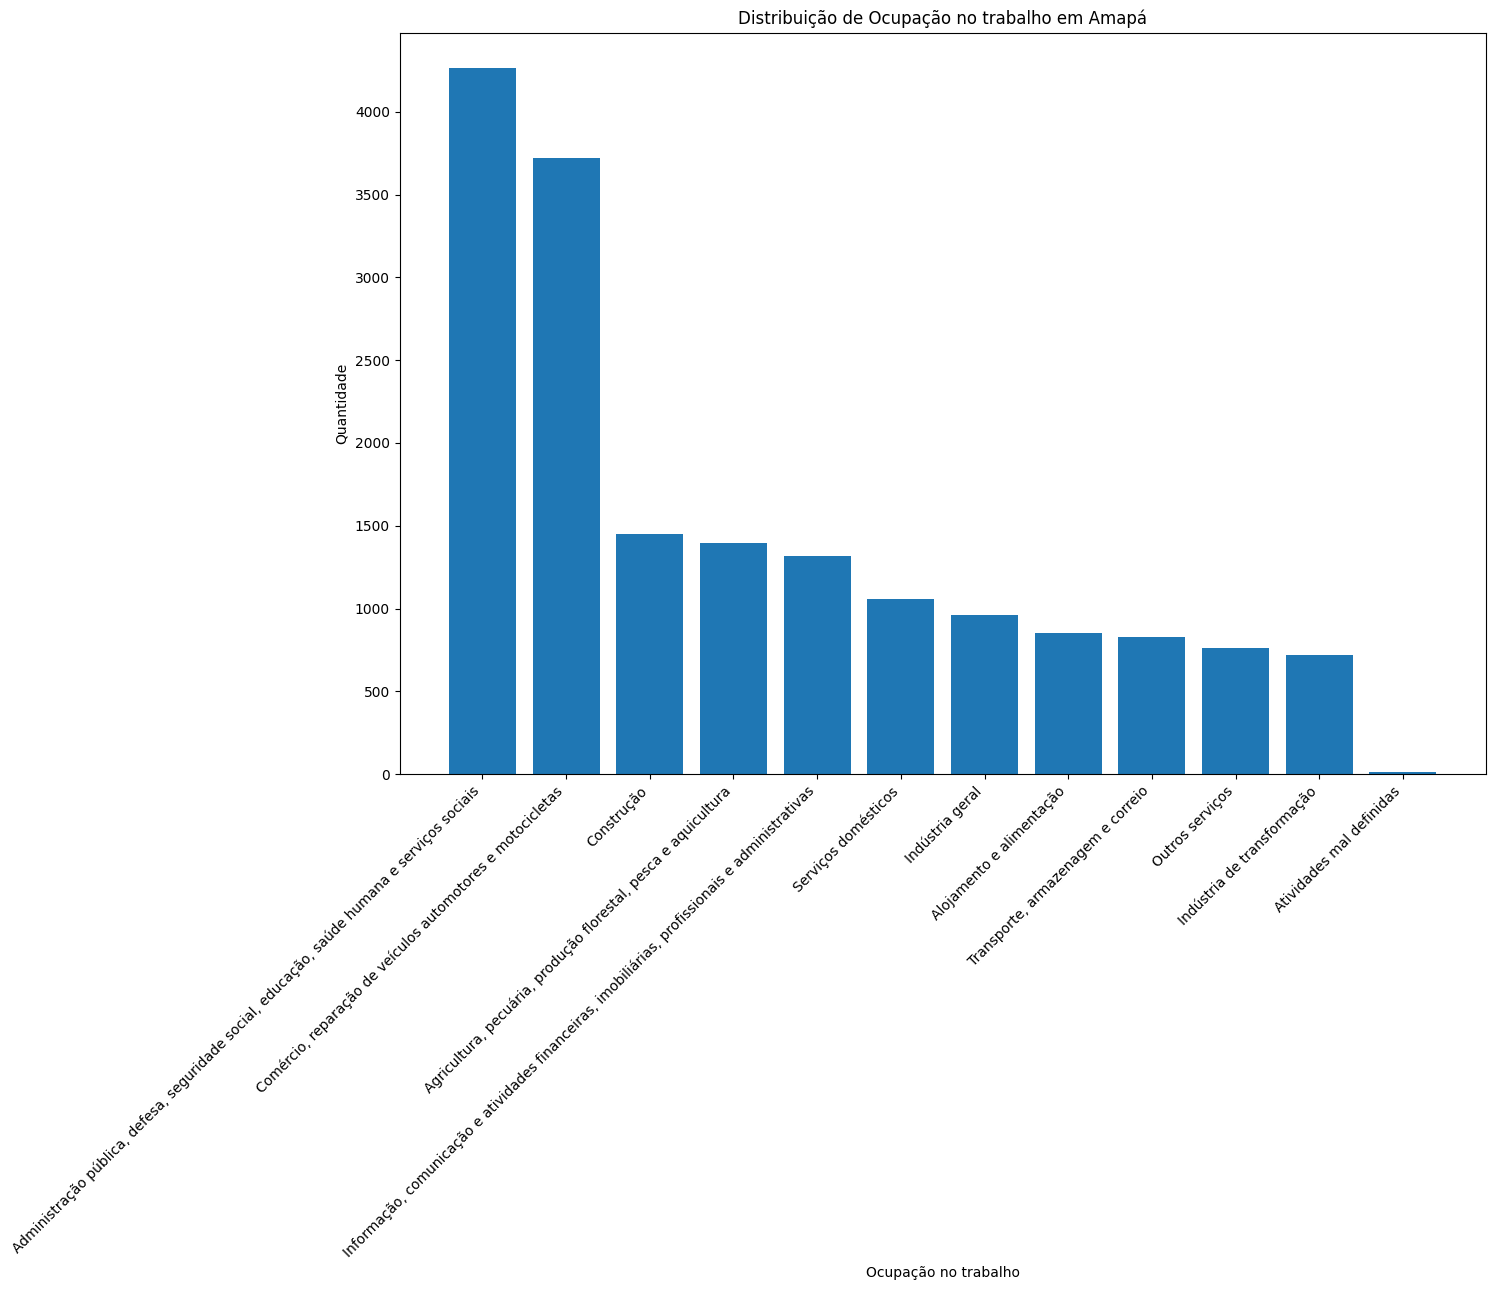

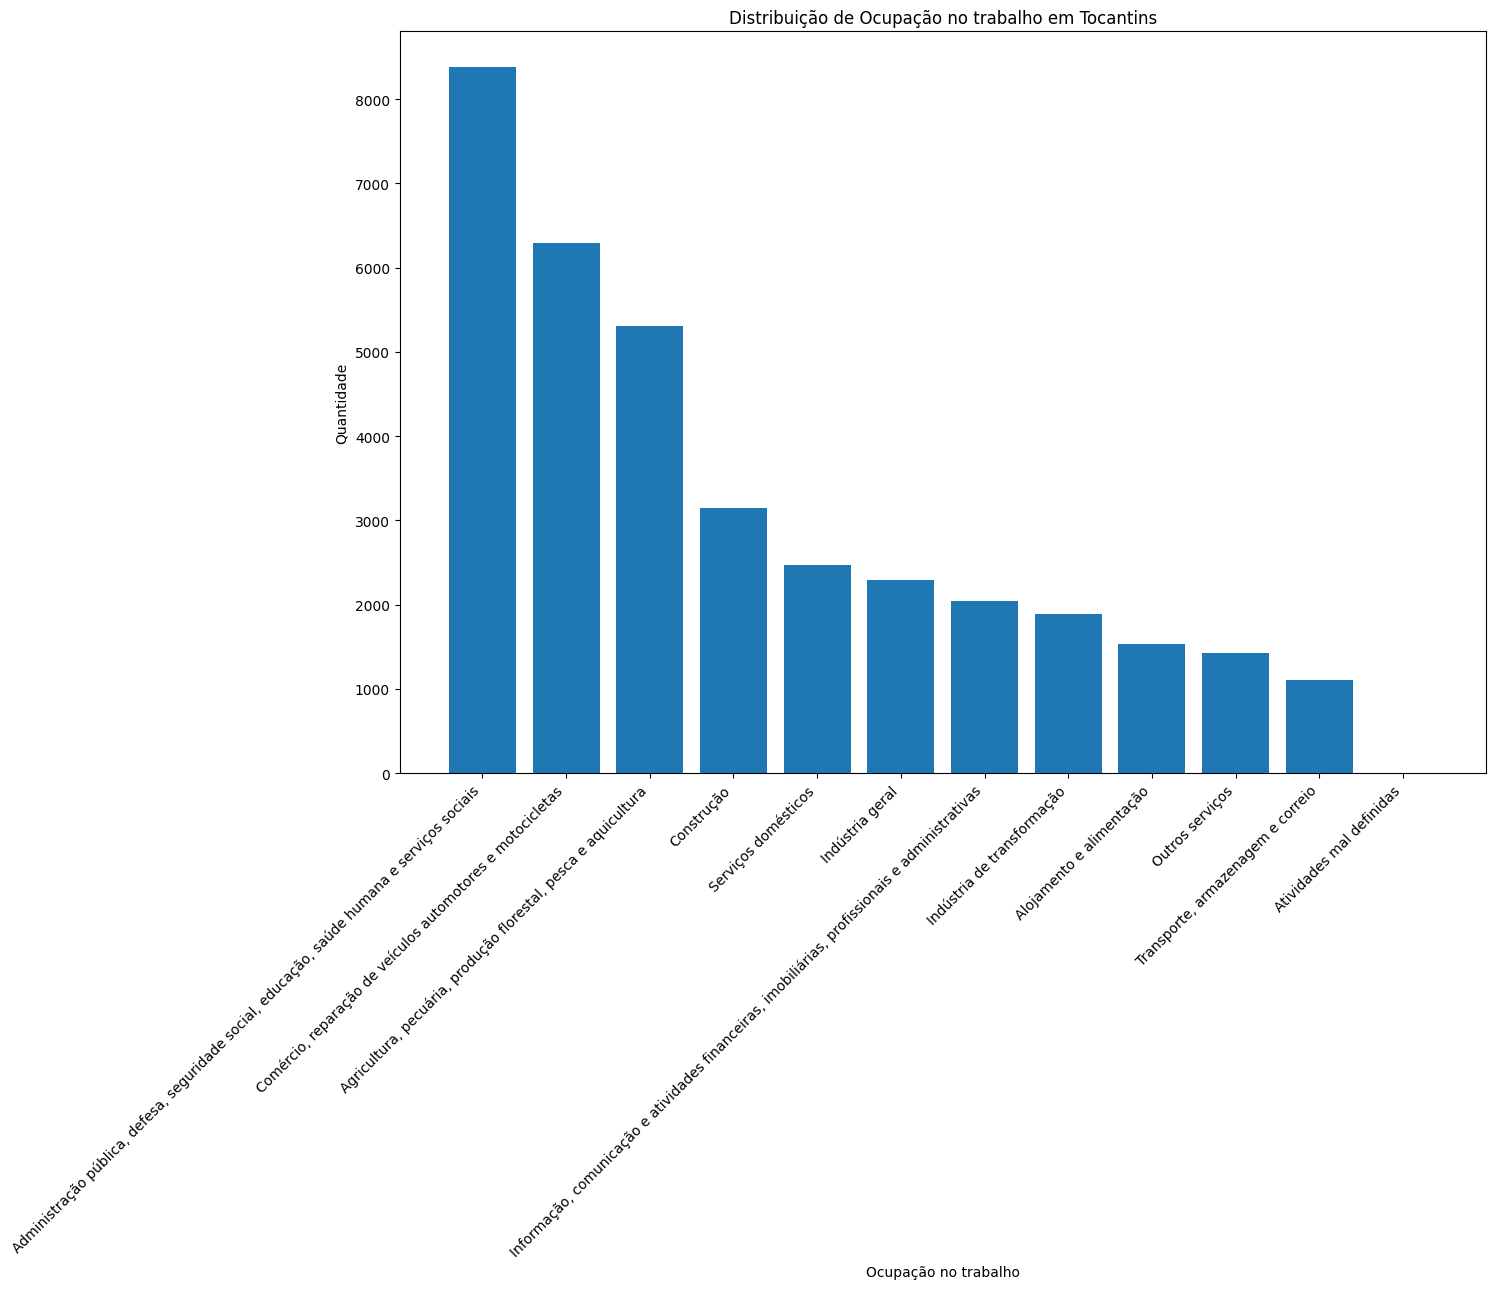

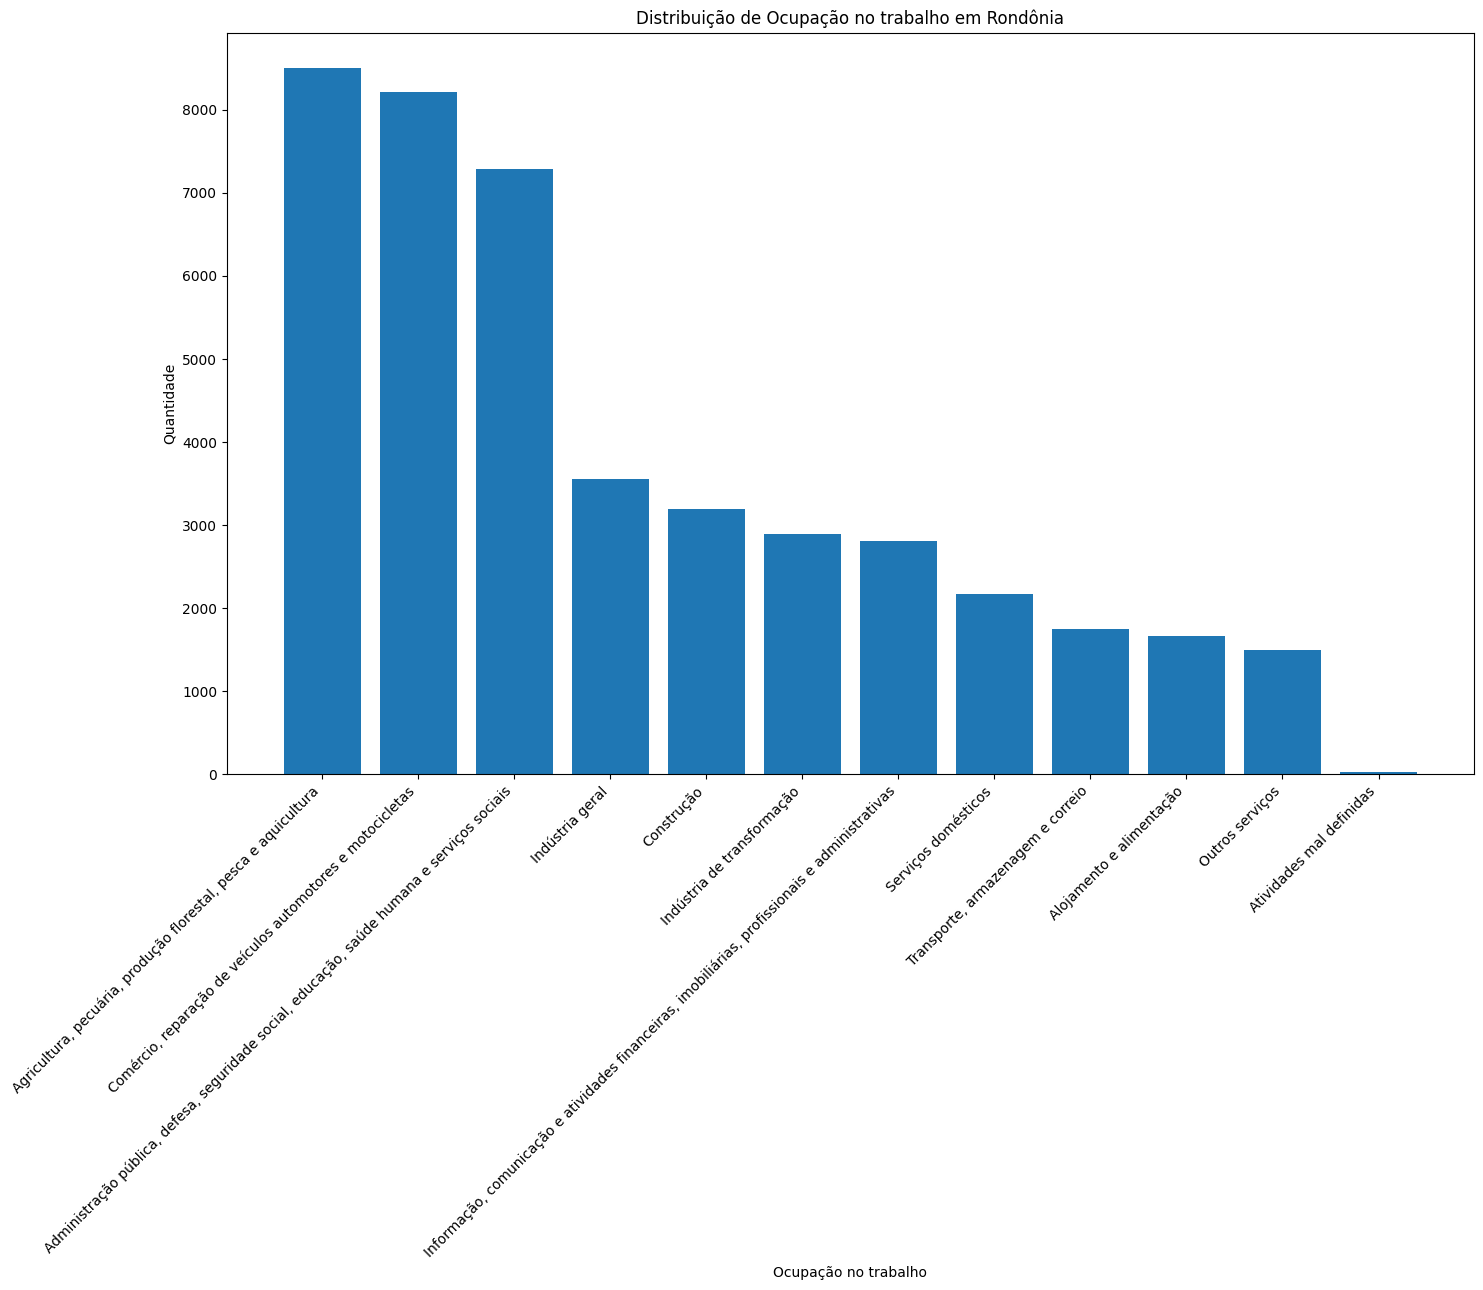

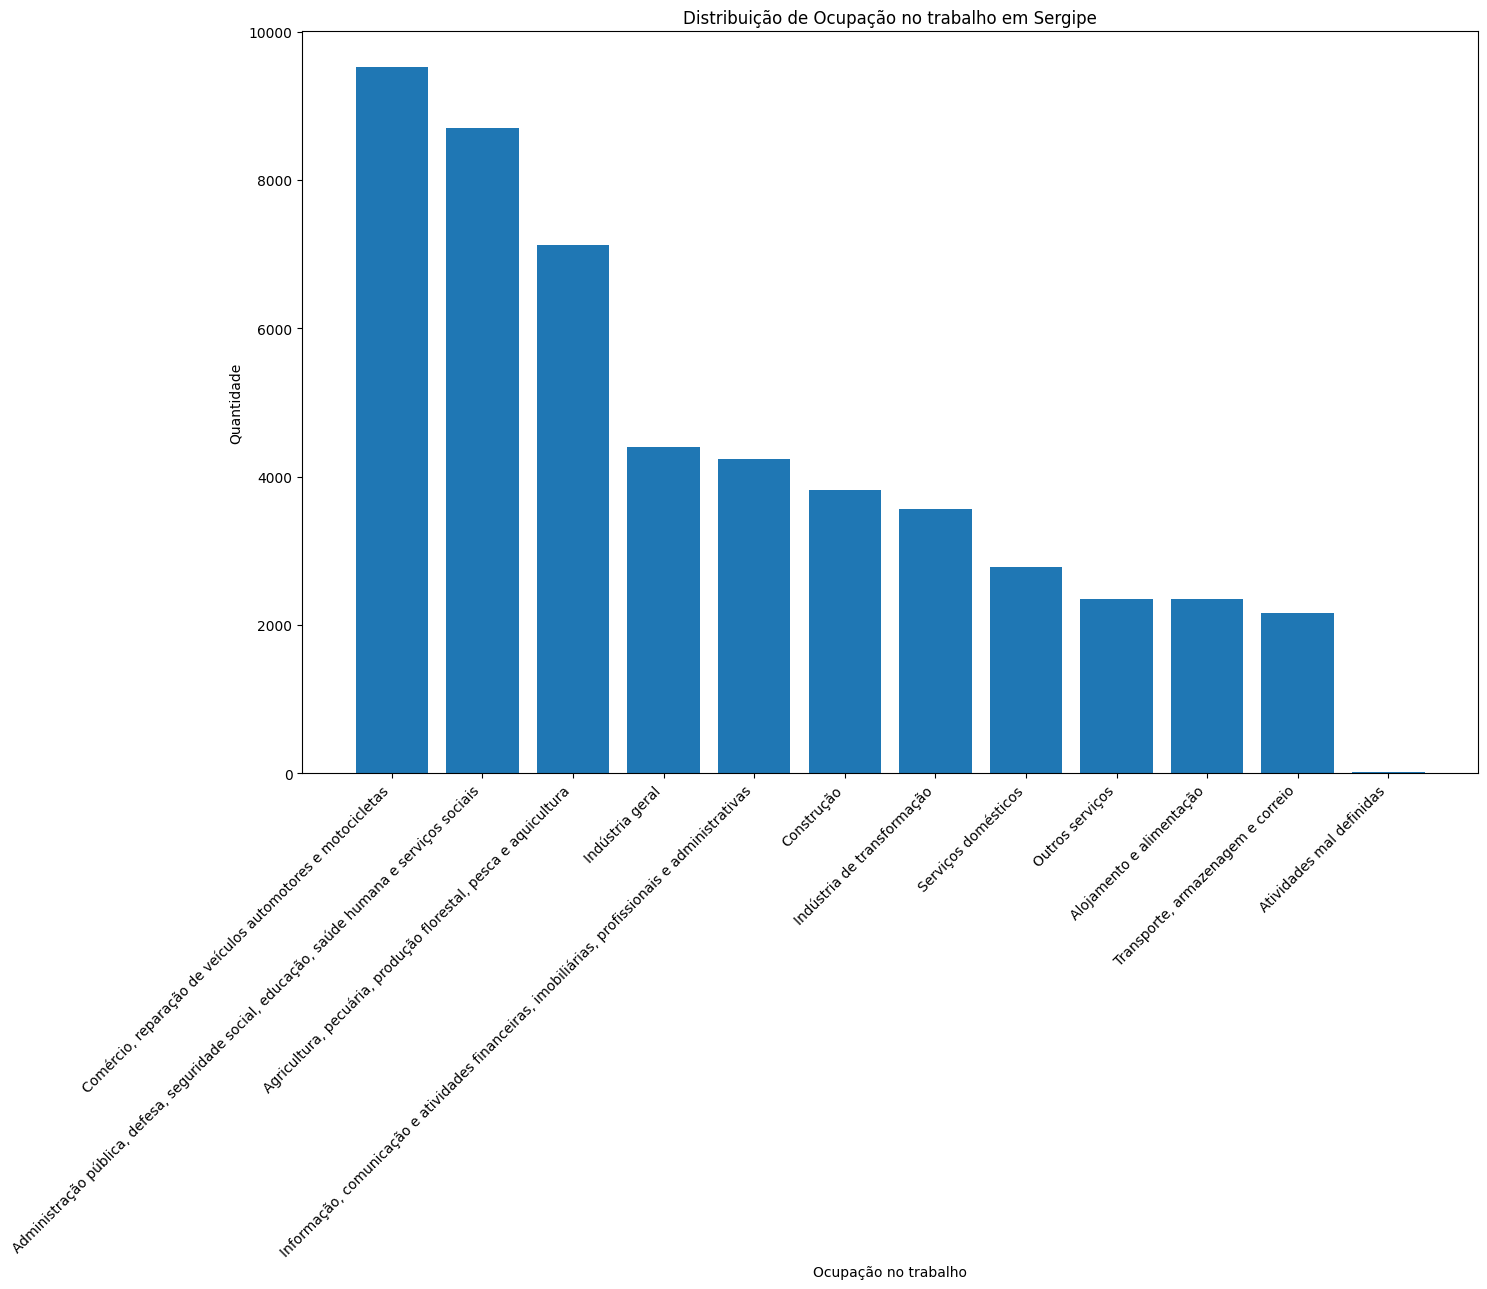

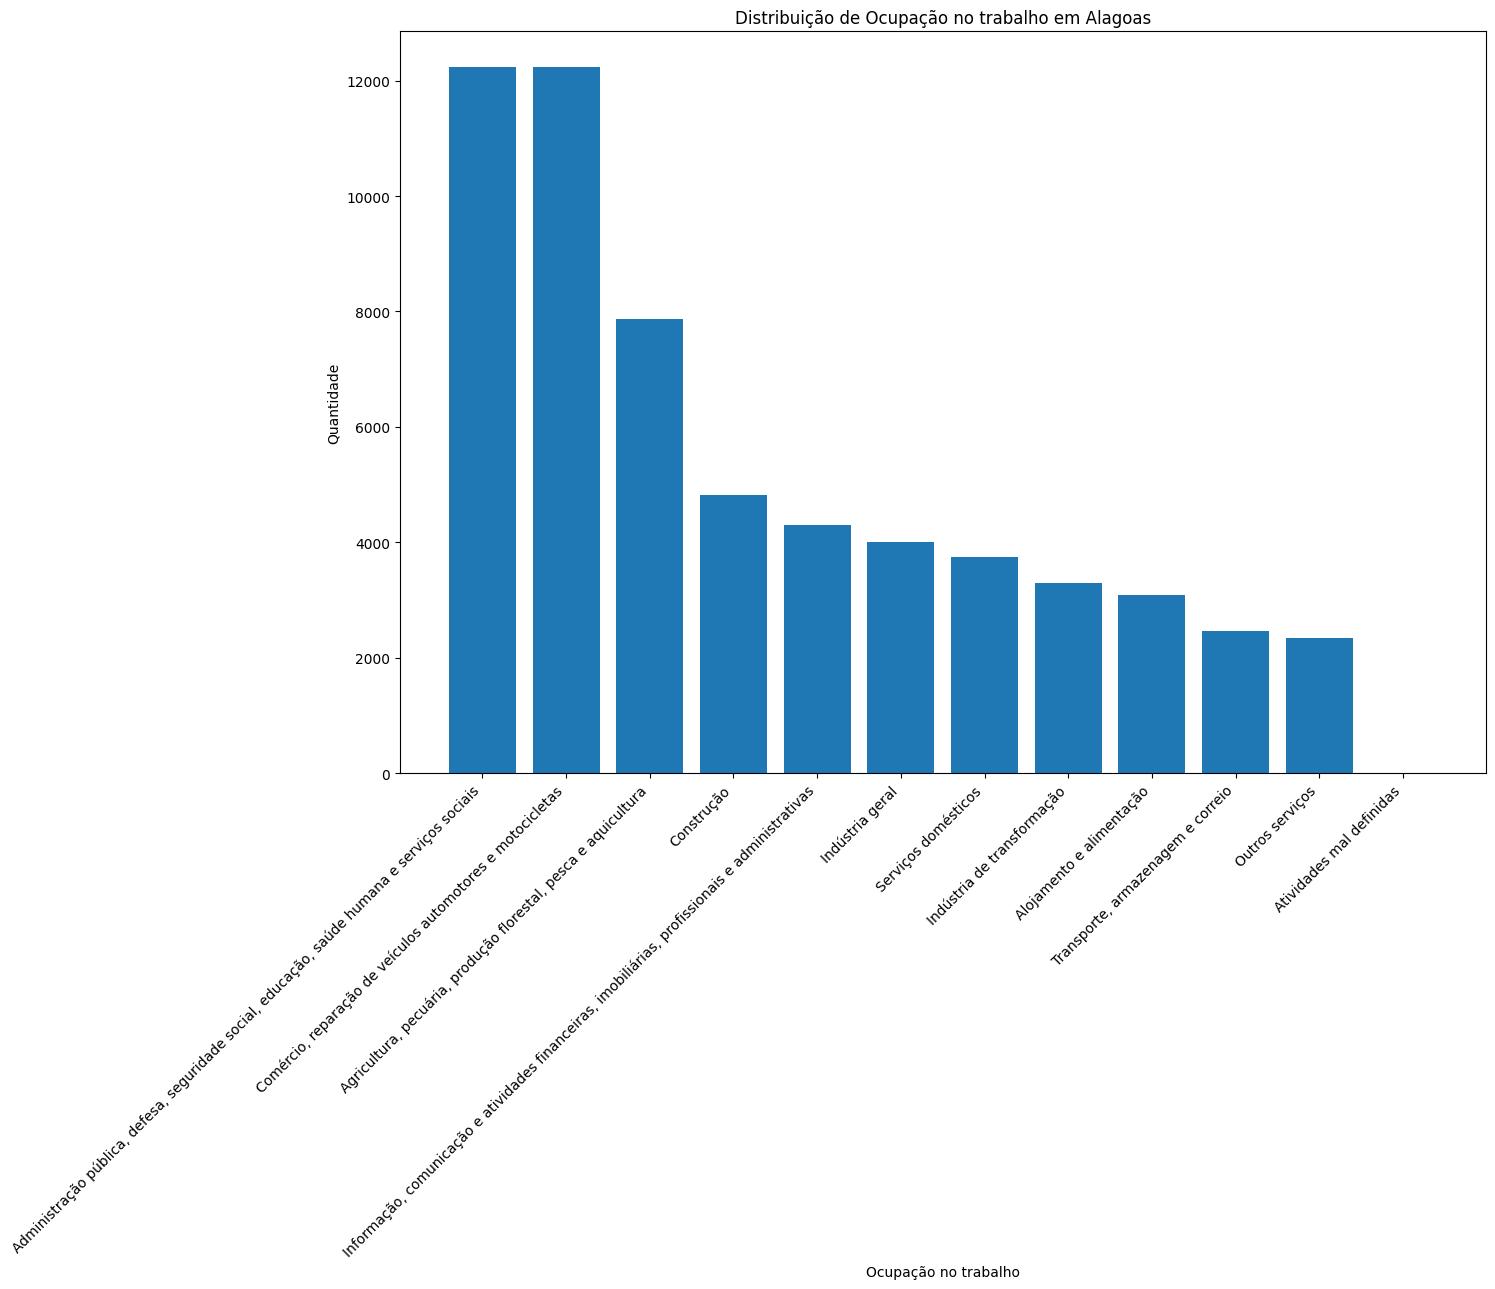

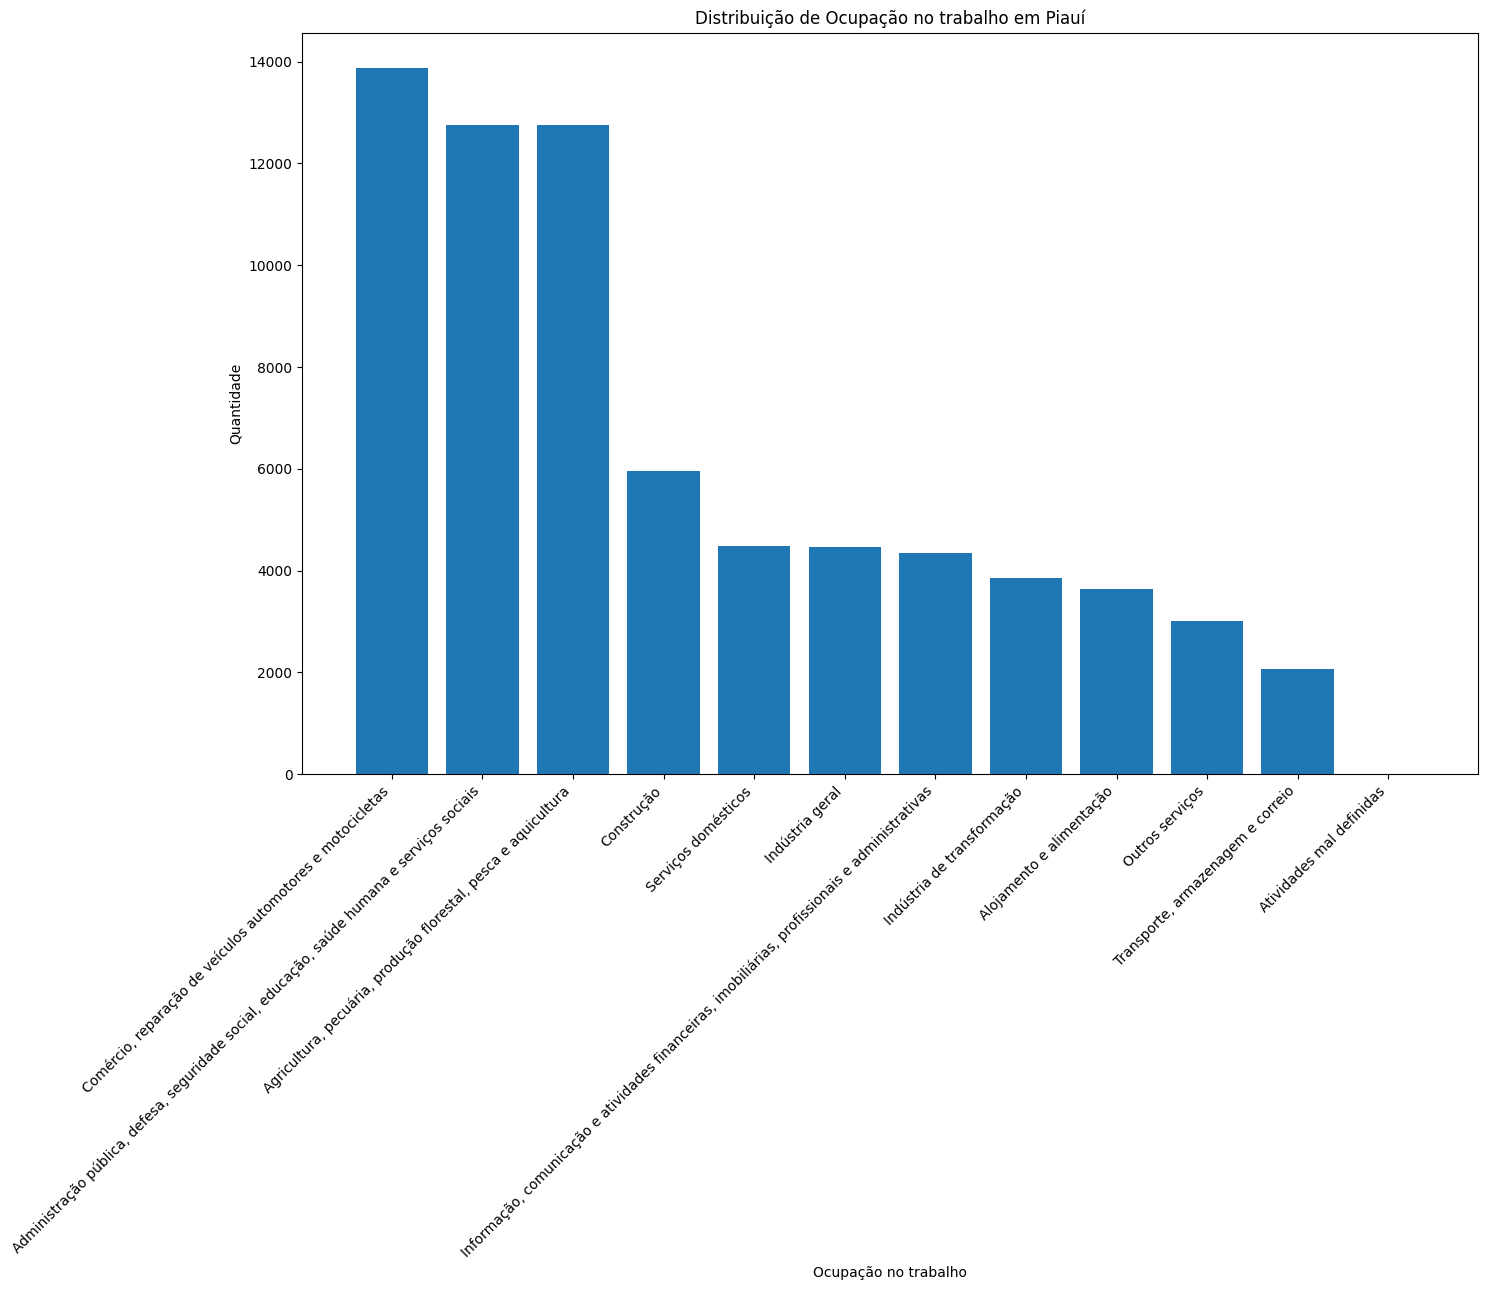

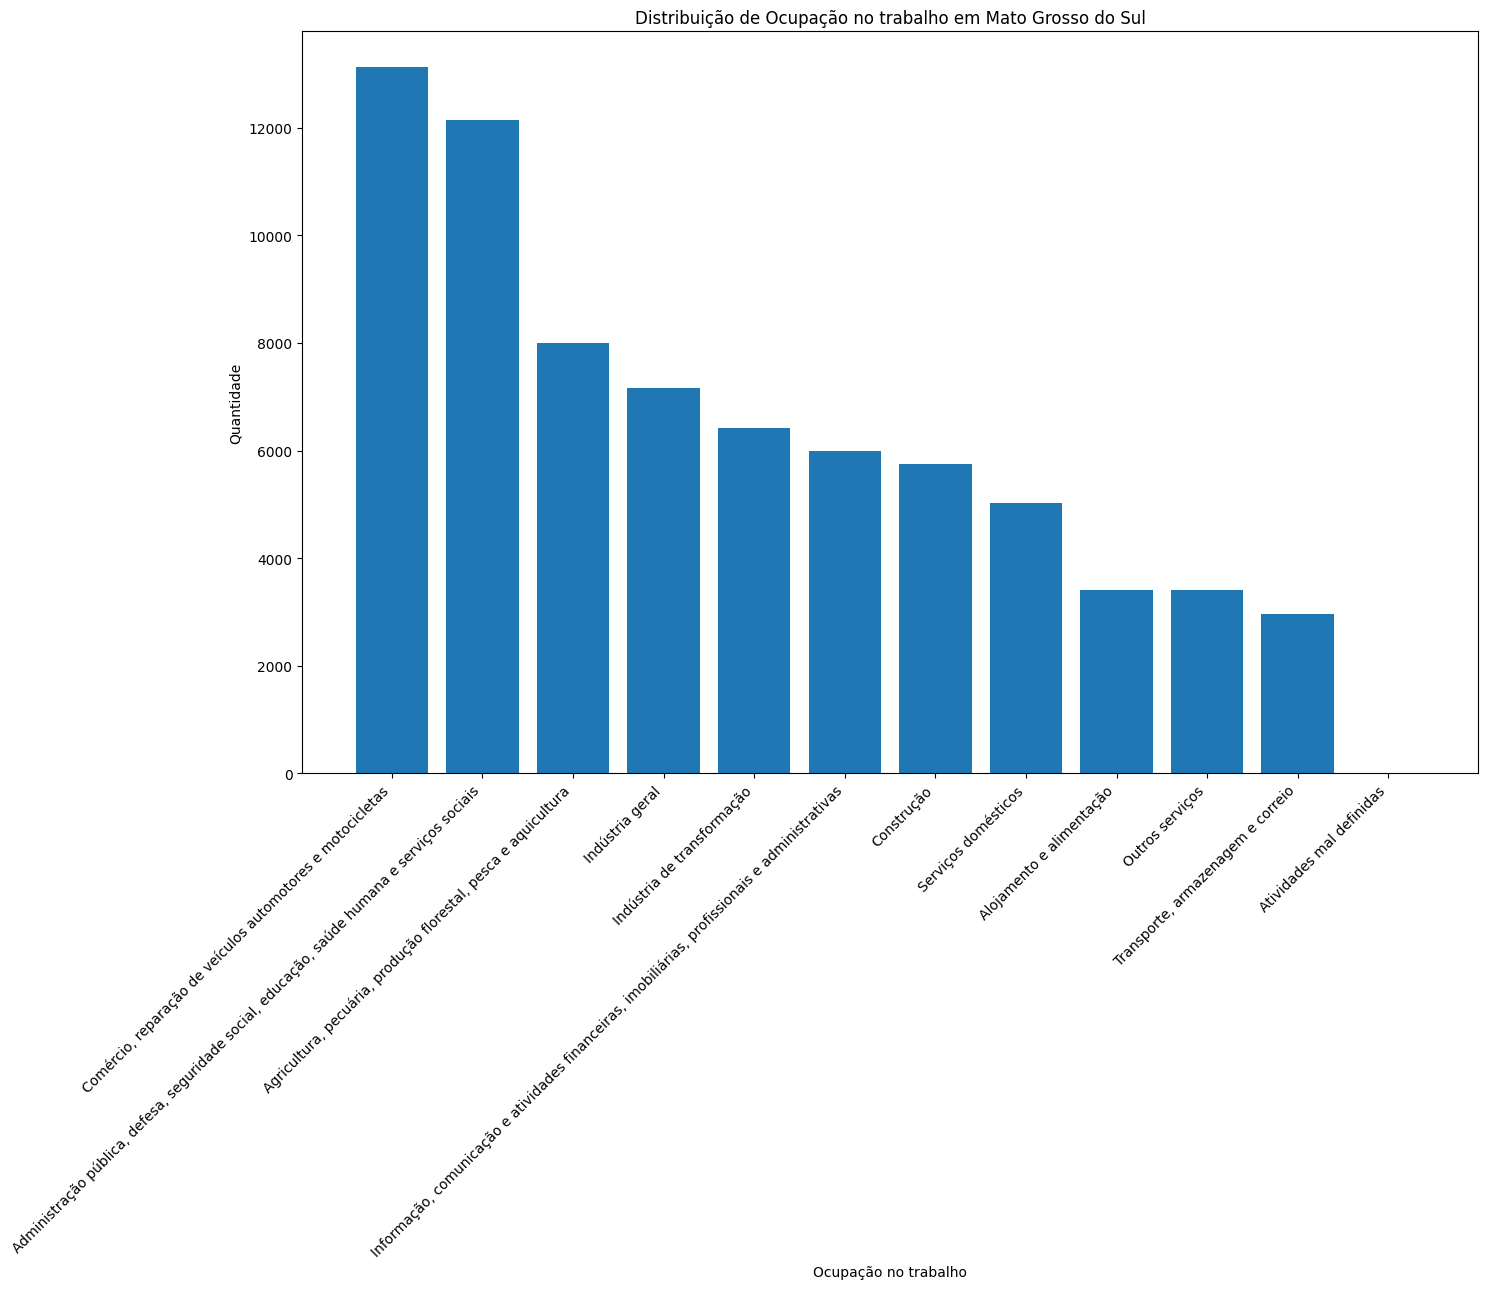

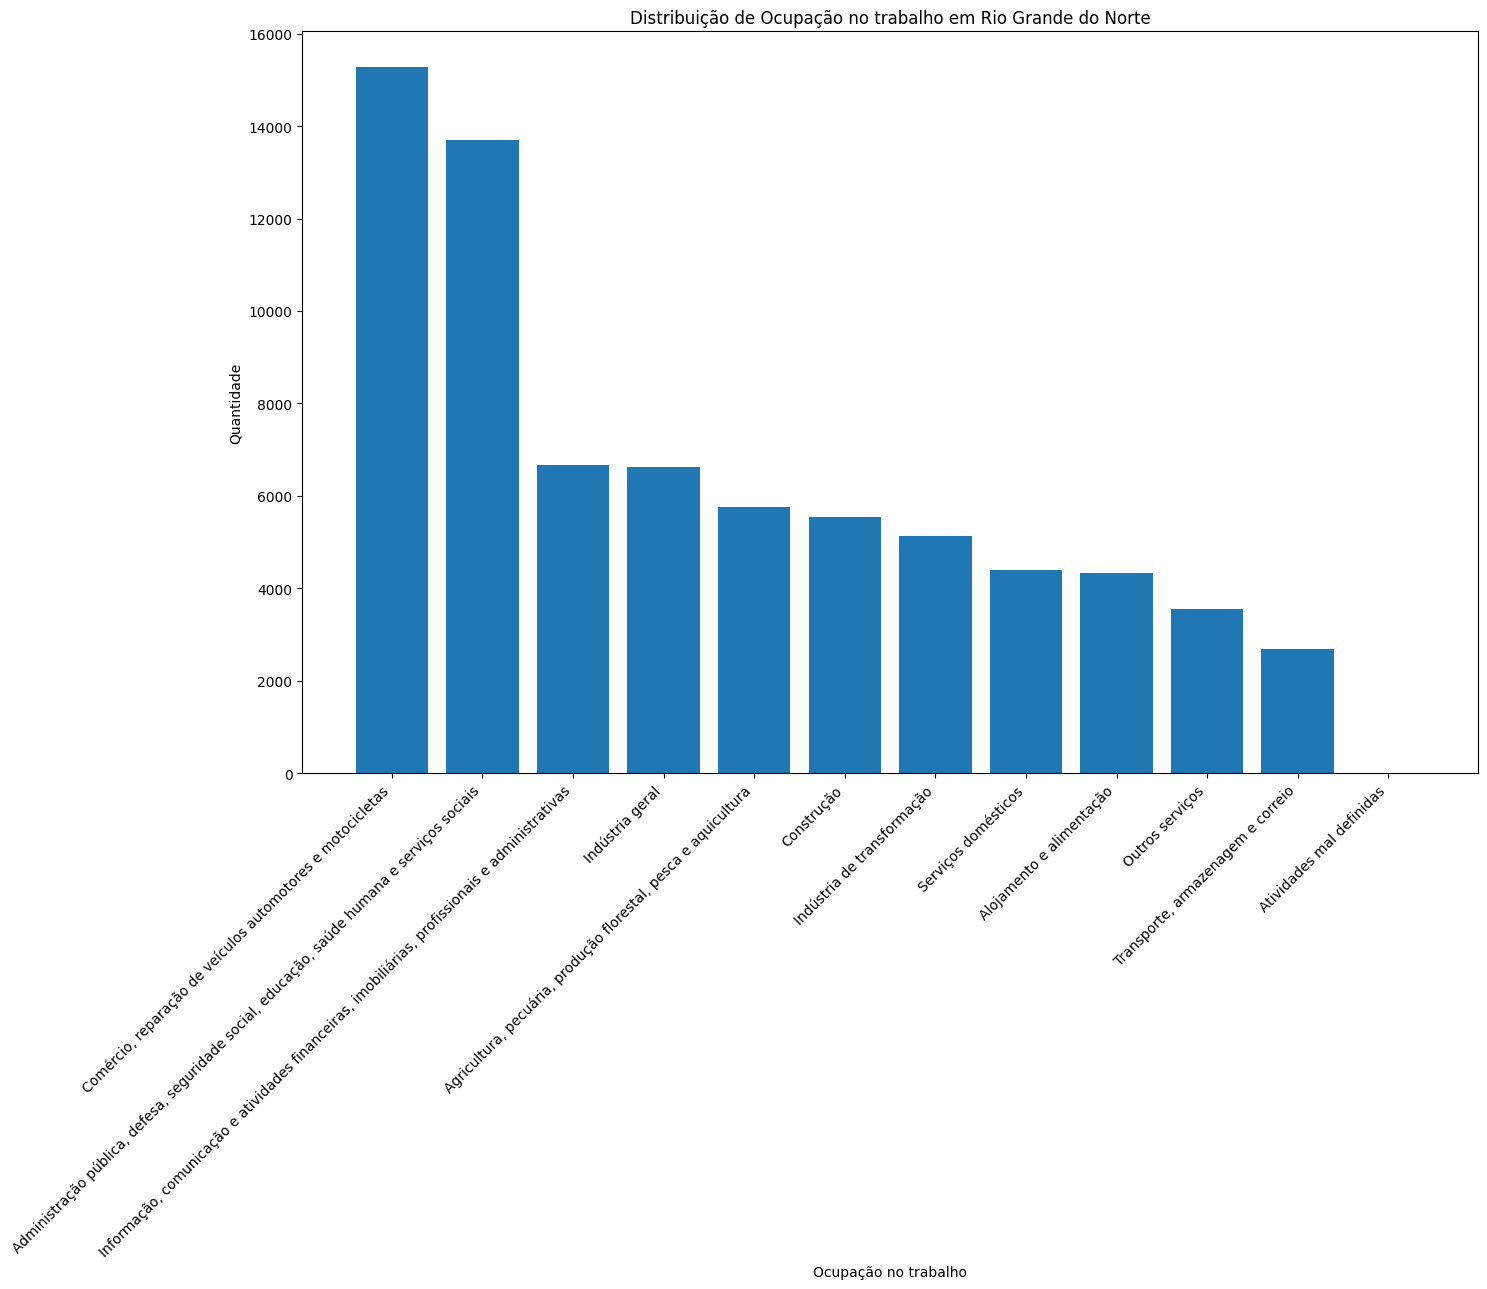

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtém os 10 municípios com MENOS ocorrências
dados_agrupados = tabela.groupby('municipio')['quantidade'].sum().reset_index()
menores_ofensores = dados_agrupados.sort_values(by=['quantidade'], ascending=True).head(10)['municipio'].tolist()  # ascending=True para ordem crescente

# Itera pelos municípios e cria um gráfico para cada um
for municipio in menores_ofensores:
    # Filtra os dados para o município atual
    dados_municipio = tabela[tabela['municipio'] == municipio]

    # Agrupa por "Ocupação no trabalho" e soma as quantidades
    dados_agrupados_ocupacao = dados_municipio.groupby('Ocupação no trabalho')['quantidade'].sum().reset_index()

    # Ordena por quantidade em ordem decrescente (opcional, mas pode ser útil para visualização)
    dados_agrupados_ocupacao = dados_agrupados_ocupacao.sort_values(by=['quantidade'], ascending=False)

    # Cria o gráfico de barras
    plt.figure(figsize=(15, 13))
    plt.bar(dados_agrupados_ocupacao['Ocupação no trabalho'], dados_agrupados_ocupacao['quantidade'])
    plt.xlabel('Ocupação no trabalho')
    plt.ylabel('Quantidade')
    plt.title(f'Distribuição de Ocupação no trabalho em {municipio}')
    plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
    plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
    plt.show()